<a href="https://colab.research.google.com/github/xiaobo-fu/python_for_finance/blob/master/forex_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/G/ML/python_for_finance/source/"
CHAPTER_ID = "python_for_finance"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import plt
np.random.seed(1000)
plt.style.use('seaborn')
%matplotlib inline

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [0]:
pip install fxcmpy

In [0]:
import fxcmpy
token = open('/content/gdrive/My Drive/G/ML/python_for_finance/token.txt').read() 
api = fxcmpy.fxcmpy(access_token=token, log_level='error')

In [0]:
def datappr(data,lags):
    data['returns'] = np.log(data['bidclose'] / data['bidclose'].shift(1))
    data.dropna(inplace=True)
    global cols
    cols = []
    
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)
    
    data.dropna(inplace=True)

    data[cols] = np.where(data[cols] > 0, 1, -1)

    data['direction'] = np.where(data['returns'] > 0, 1, -1)

    mu = data['returns'].mean()
    v = data['returns'].std()
    bins = [mu - v, mu, mu + v]
    
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [0]:
def match(raw, start, end):
    global score
    score = []
    
    for k in range(len(periods)):
        score.append([])
        for i in range(start, end):
            data = pd.DataFrame(raw[k])
            datappr(data, i)
            train, test = train_test_split(data, test_size=0.5, shuffle=False, random_state=42)
            model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=2 * [250], random_state=1)
            model.fit(train[cols_bin], train['direction'])
            test['position'] = model.predict(test[cols])
            print(i);print(accuracy_score(test['direction'], test['position']))
            score[k].append(accuracy_score(test['direction'], test['position']))
            test['strategy'] = test['position'] * test['returns']
            fig = plt.figure(figsize =(10,6))
            plt.plot(test['strategy'].cumsum(),label = i)
            plt.title('Time Frame:' +periods[k]+'      Lag %d      Score:%.4f'%(i,
                                          accuracy_score(
                                              test['direction'], test['position'])

                                         )
                     )
            plt.show()

In [0]:
sym = api.get_instruments()
sym

In [0]:
api.subscribe_market_data('GBP/USD')

In [0]:
periods = ['m1', 'm5', 'm15', 'm30', 'H1', 'H2', 'H3', 'H4', 'H6', 'H8', 'D1', 'W1', 'M1']

In [0]:
data = []
for i in range(len(periods)):
    global data
    data.append(pd.DataFrame(
        api.get_candles('GBP/USD', period=periods[i], number=5000)
        )
    )

3
0.5308246597277823


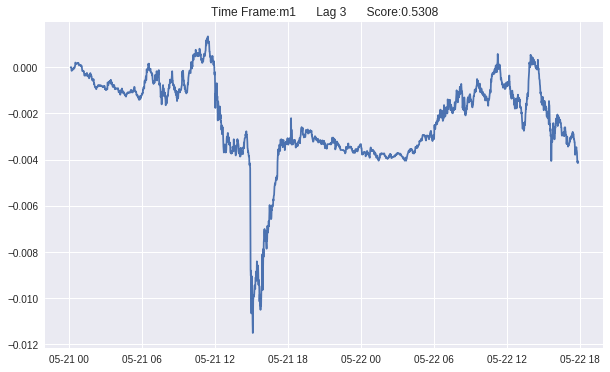

4
0.5320256204963971


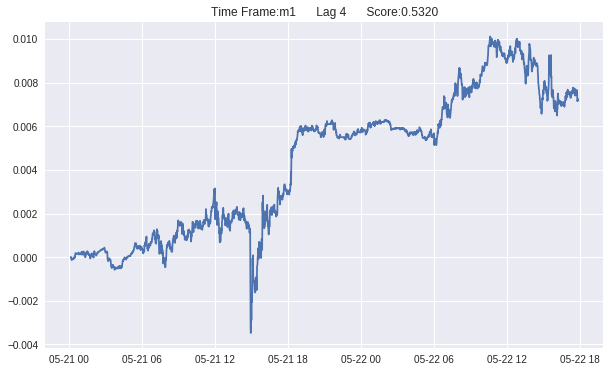

5
0.47937525030036043


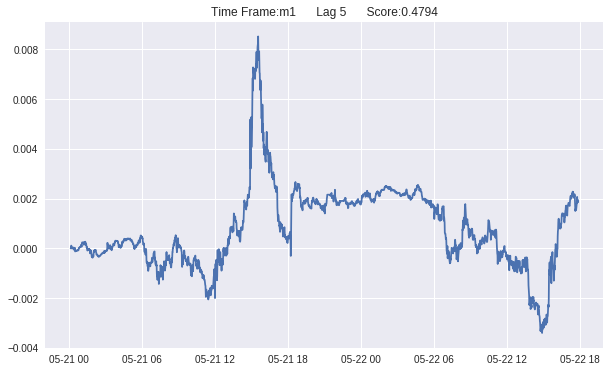

6
0.5382458950740889


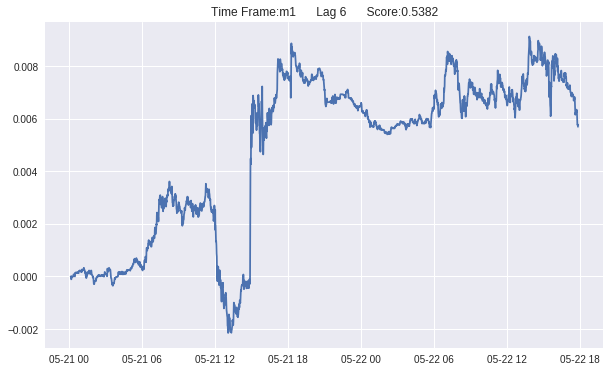

7
0.46113782051282054


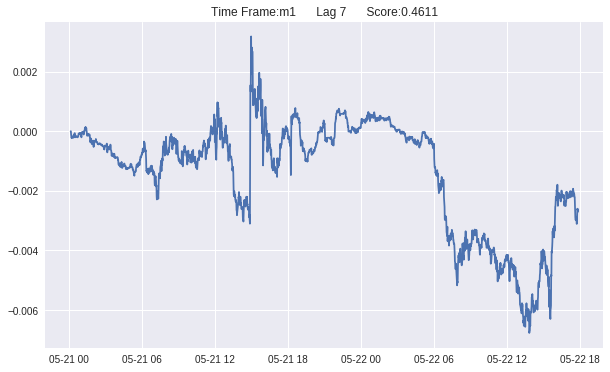

8
0.4831730769230769


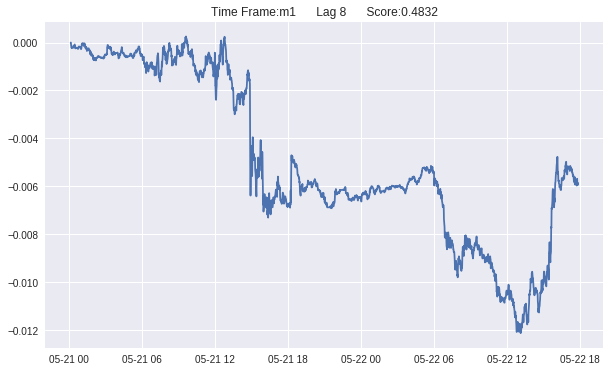

9
0.51062124248497


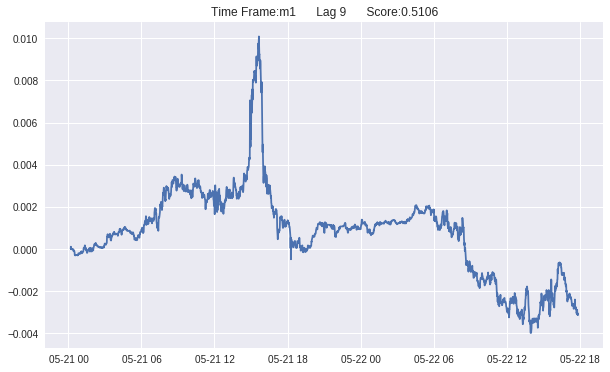

10
0.47054108216432866


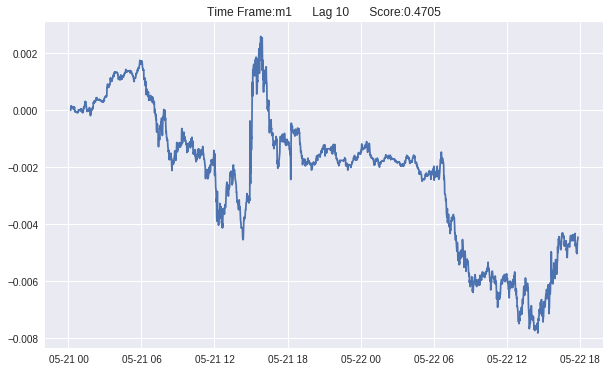

11
0.48917401764234164


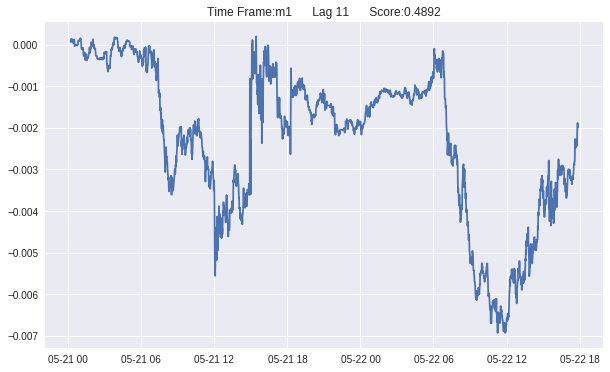

12
0.5008019246190858


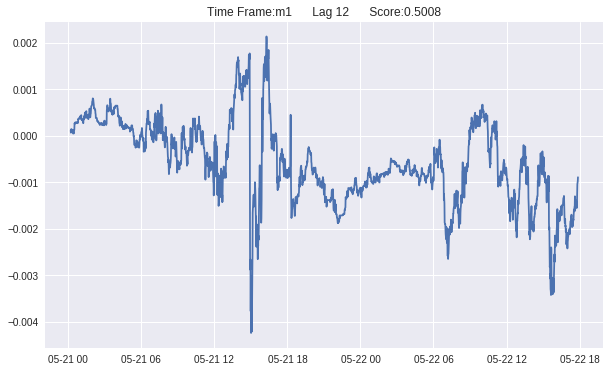

13
0.50220617729643


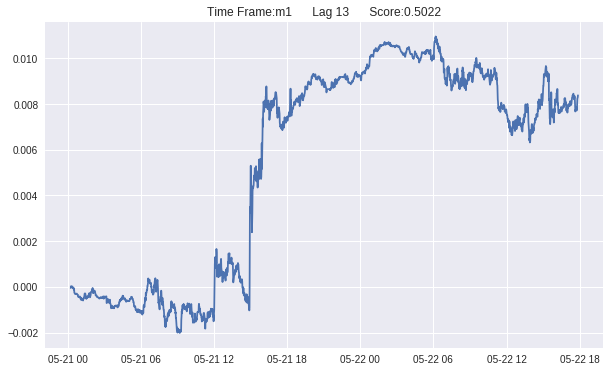

14
0.49097472924187724


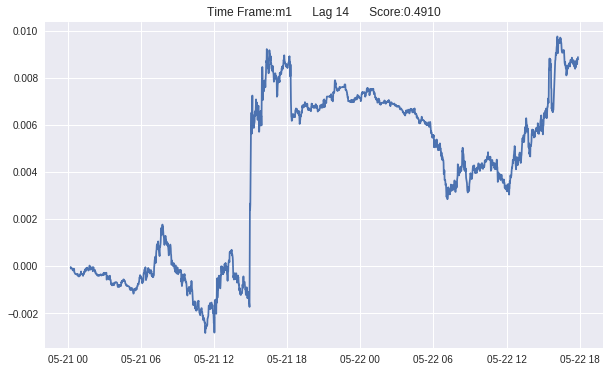

15
0.5192616372391653


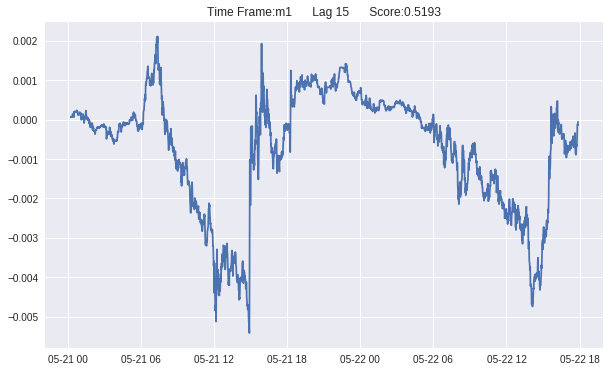

16
0.5228731942215088


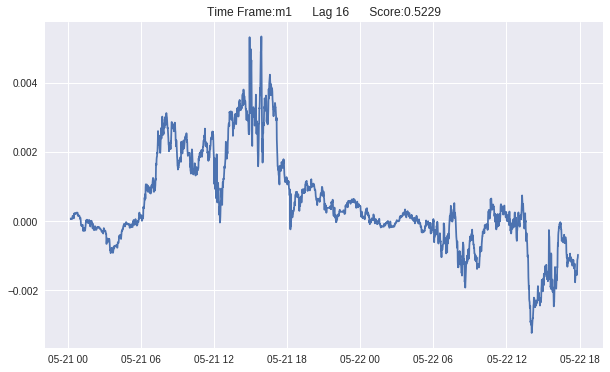

17
0.48494580489763145


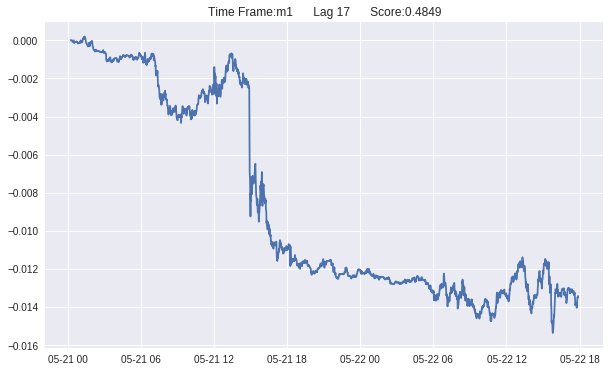

18
0.4973906061822561


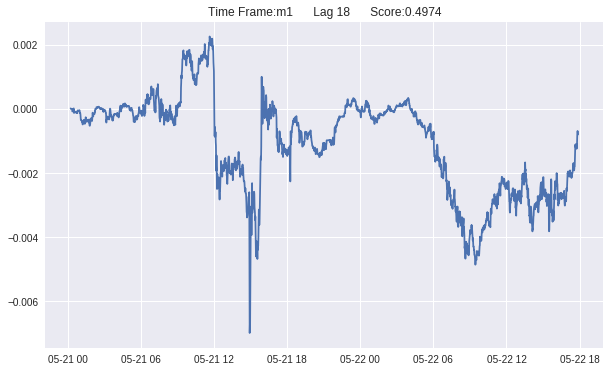

19
0.5056224899598394


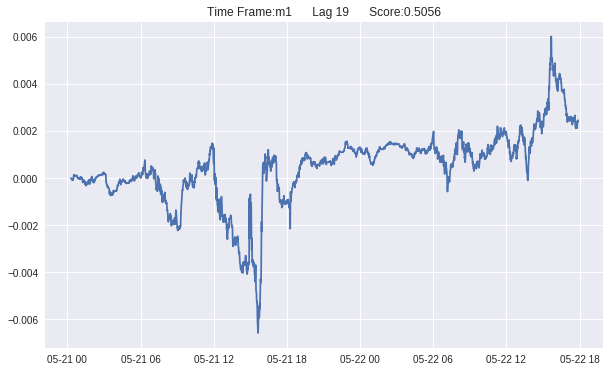

20
0.506425702811245


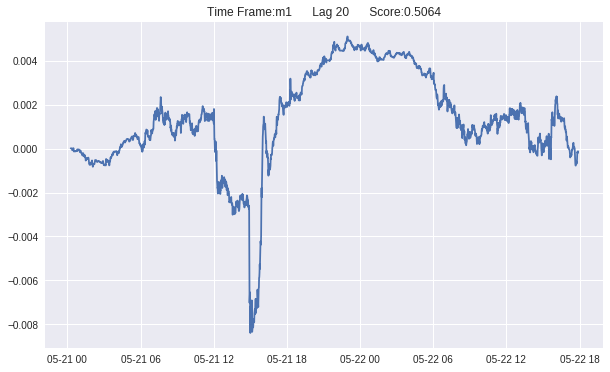

21
0.48613901165126555


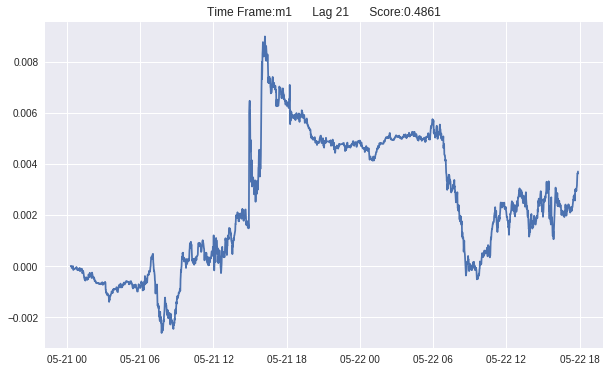

22
0.5114503816793893


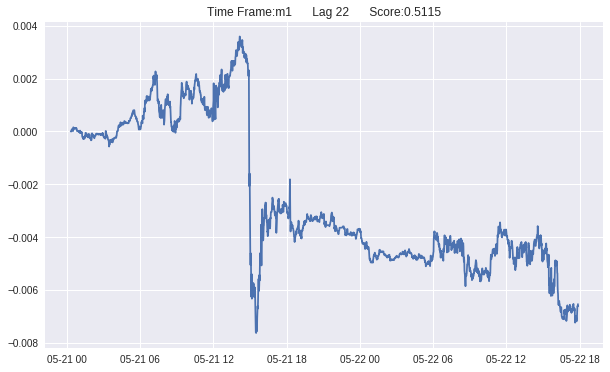

23
0.520096463022508


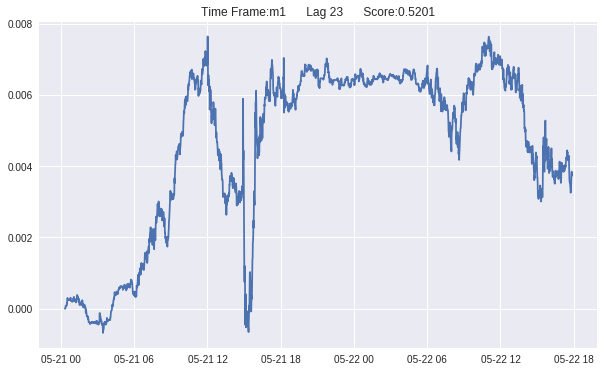

24
0.5140675241157556


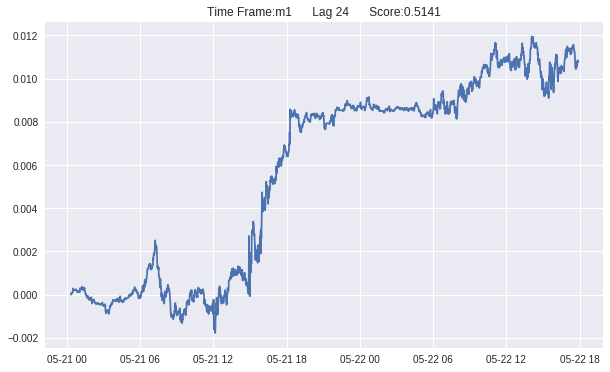

25
0.5022114997989545


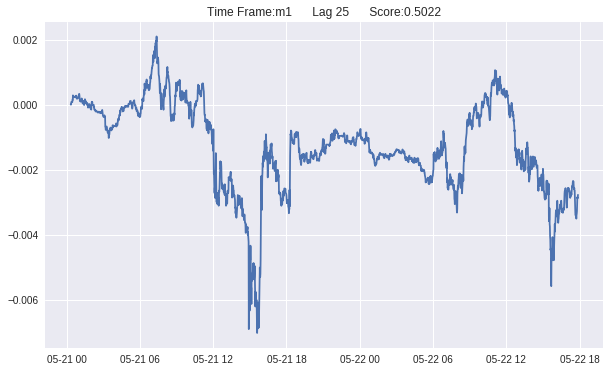

26
0.5182951347004423


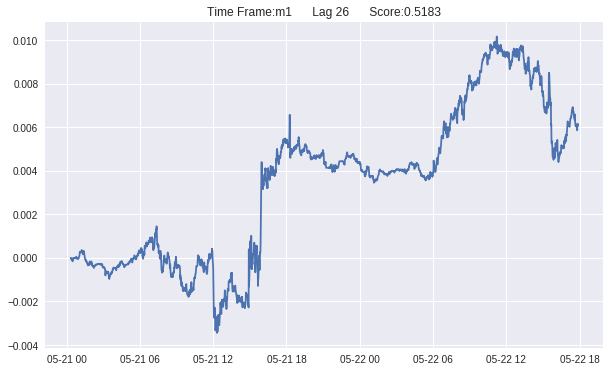

27
0.5309734513274337


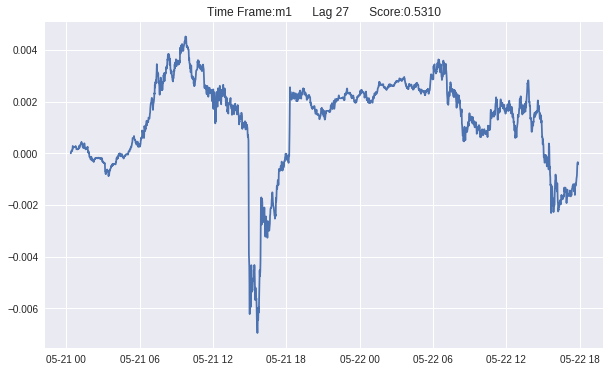

28
0.5124698310539019


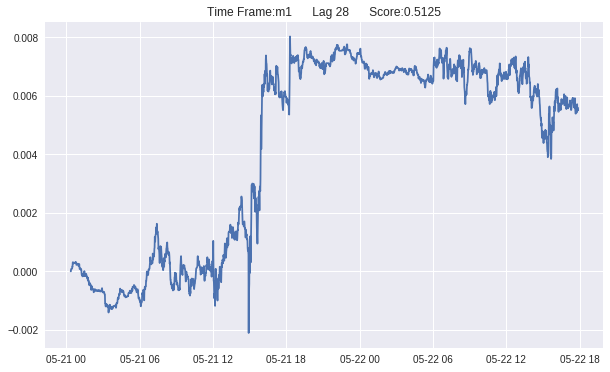

29
0.5002012072434607


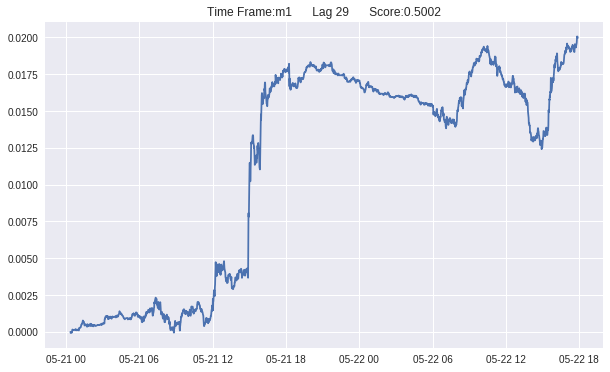

30
0.4973843058350101


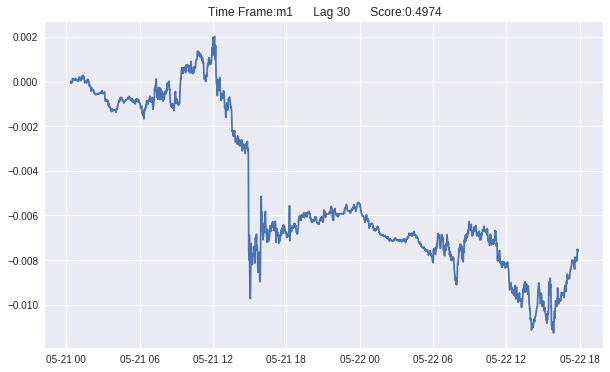

31
0.4863123993558776


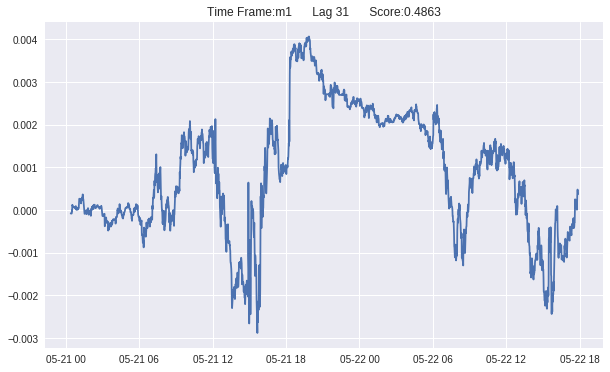

32
0.5052334943639292


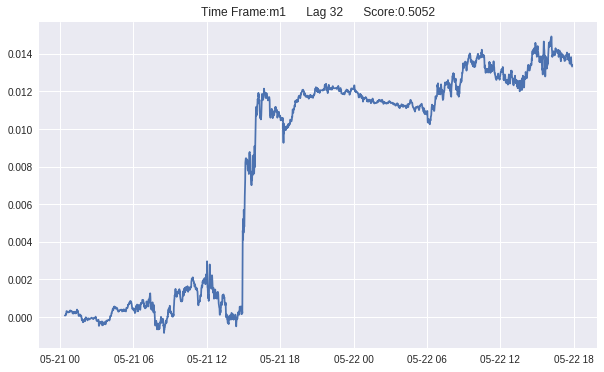

33
0.5146999597261377


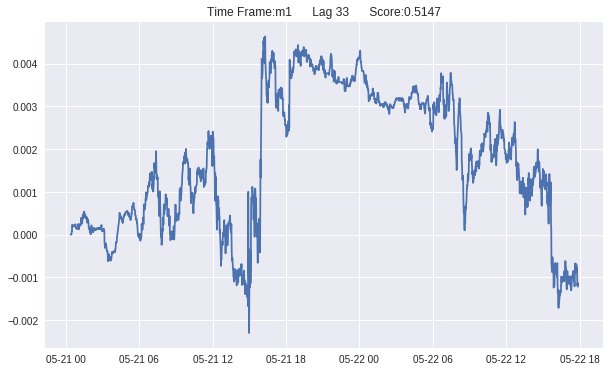

34
0.4708014498590415


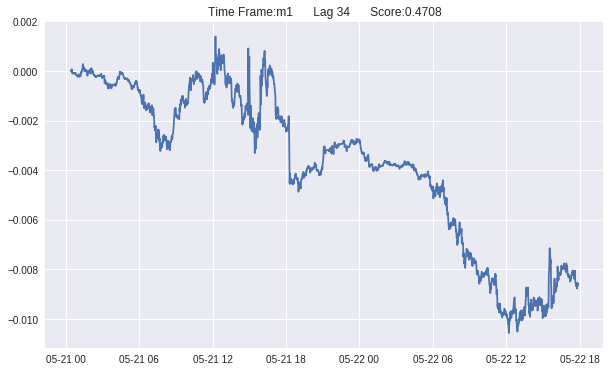

35
0.492344883158743


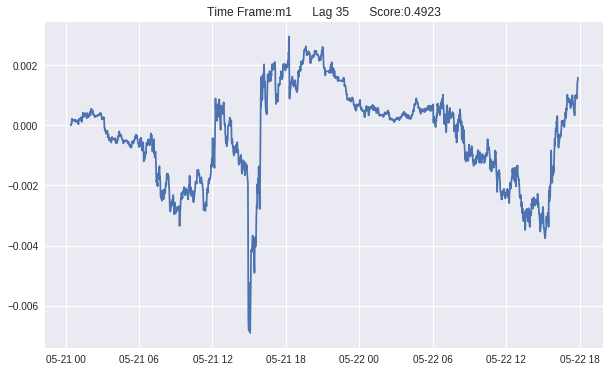

36
0.5225624496373892


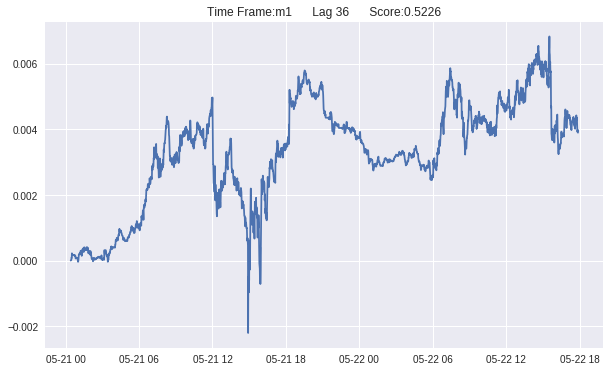

37
0.49657396211205157


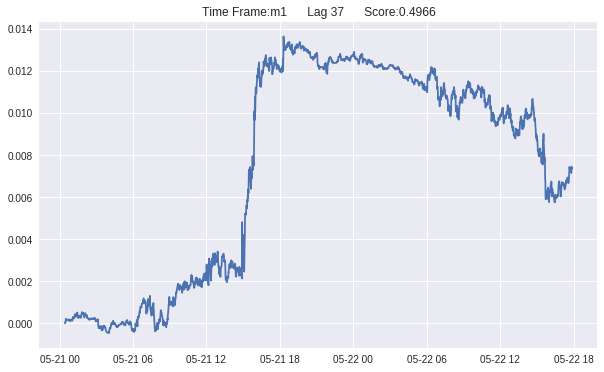

38
0.49455864570737607


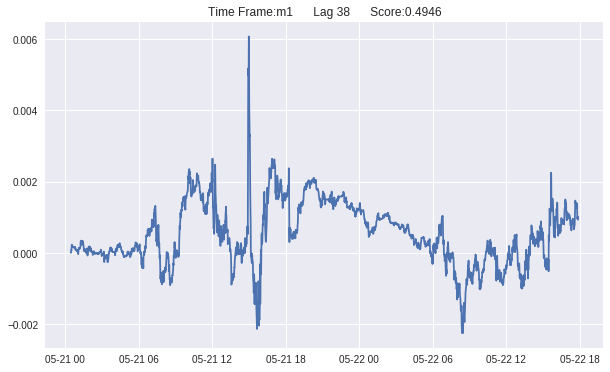

39
0.5447580645161291


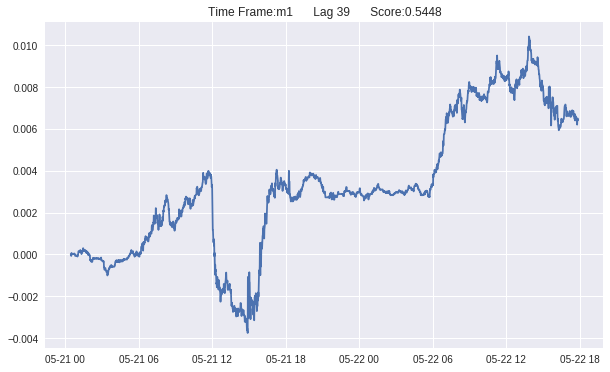

40
0.5


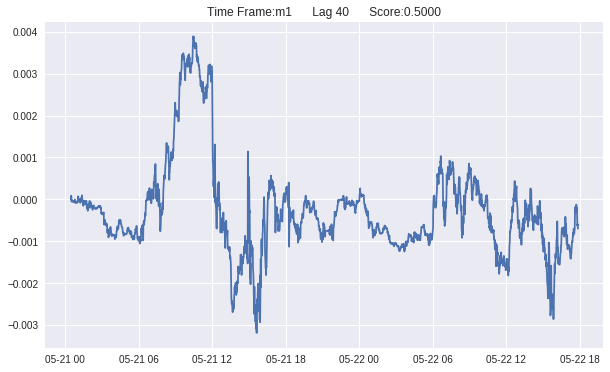

41
0.5203711173860428


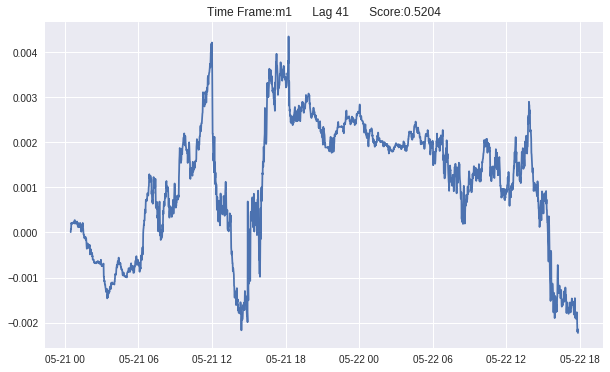

42
0.509076240419524


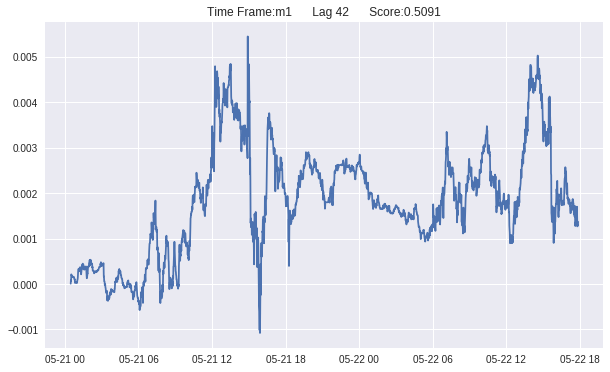

43
0.5230024213075061


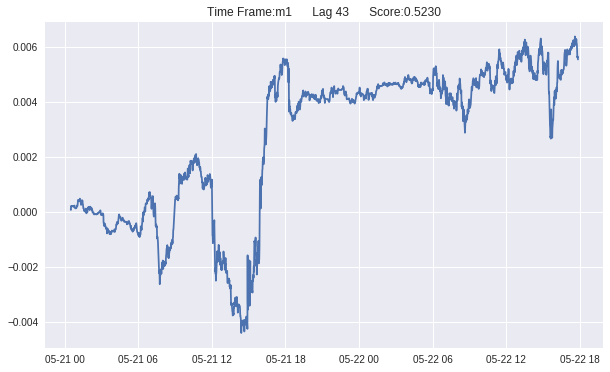

44
0.5088781275221953


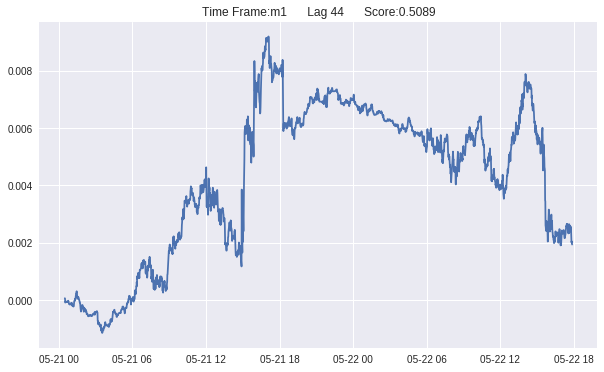

45
0.5365361324182479


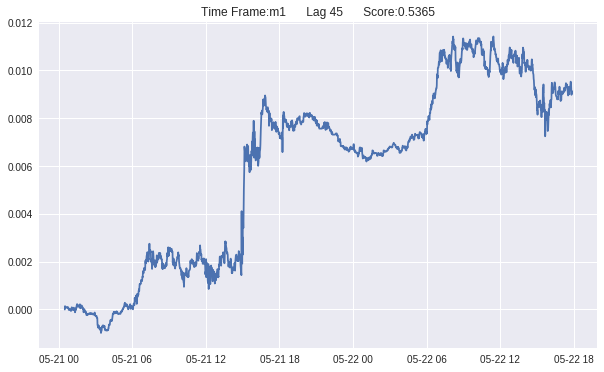

46
0.5381509890997174


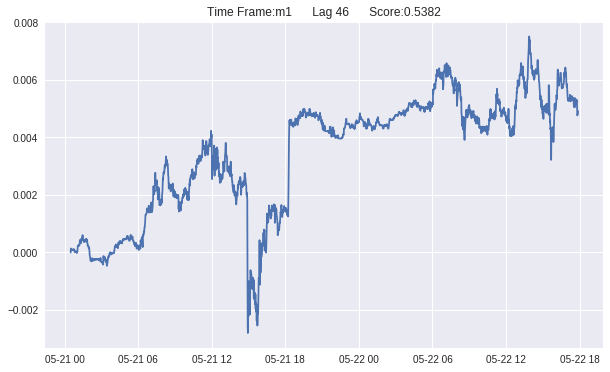

47
0.5068659127625202


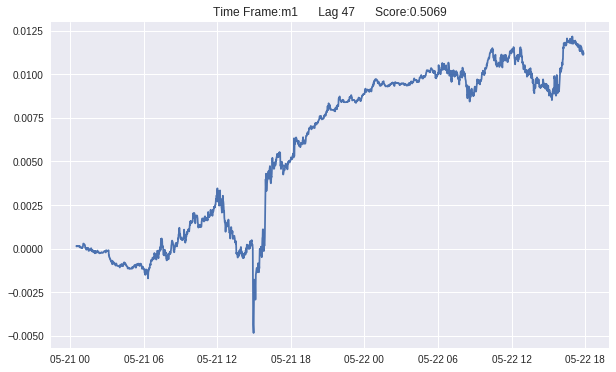

48
0.5331179321486268


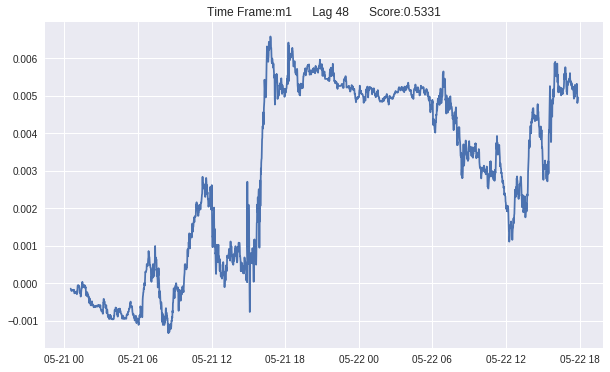

49
0.5284848484848484


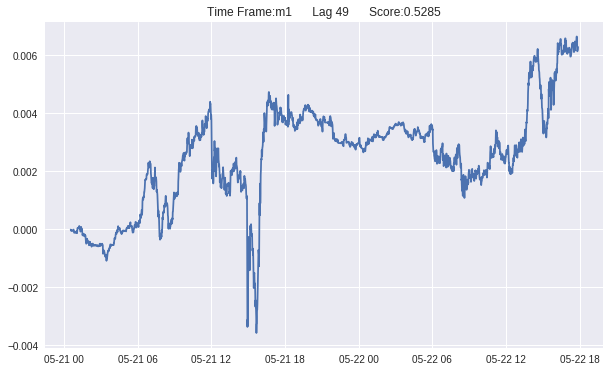

50
0.5264646464646464


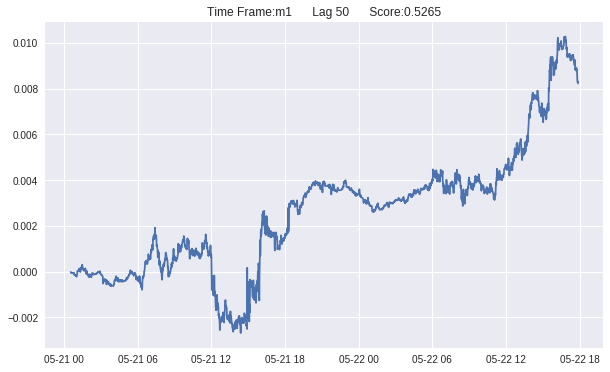

51
0.5315278900565885


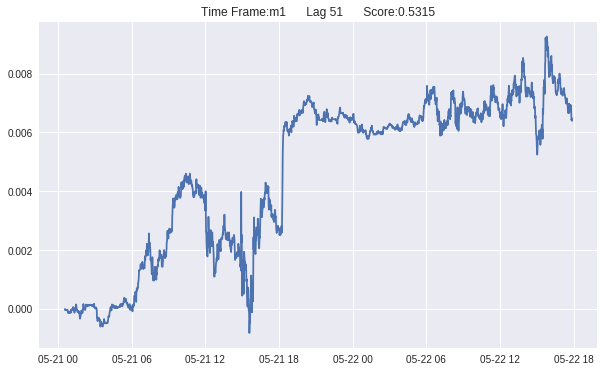

52
0.5194017784963622


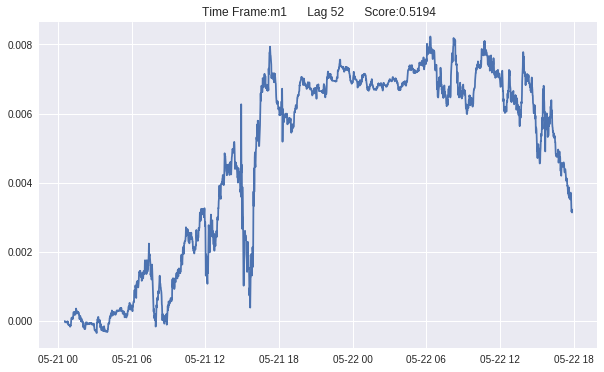

53
0.5313384553174282


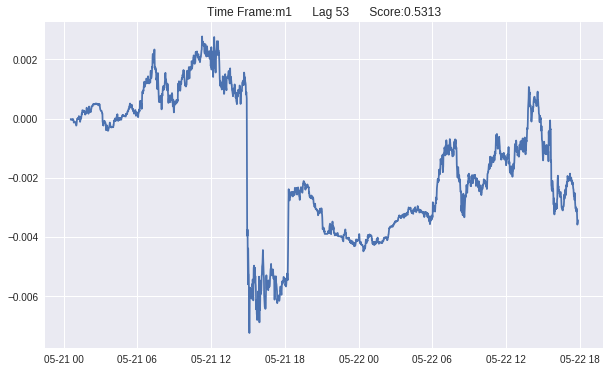

54
0.47998382531338457


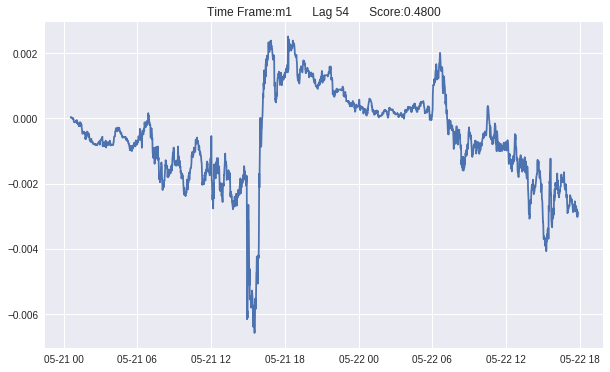

55
0.5234627831715211


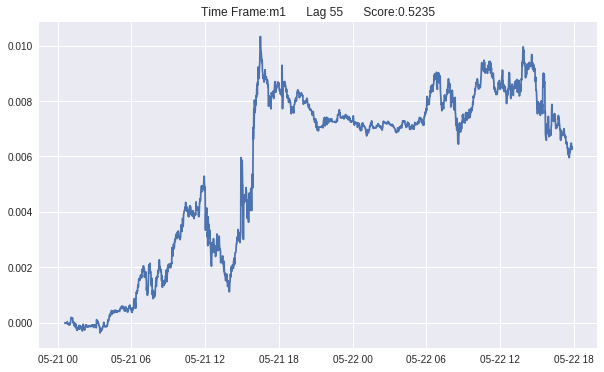

56
0.5222491909385113


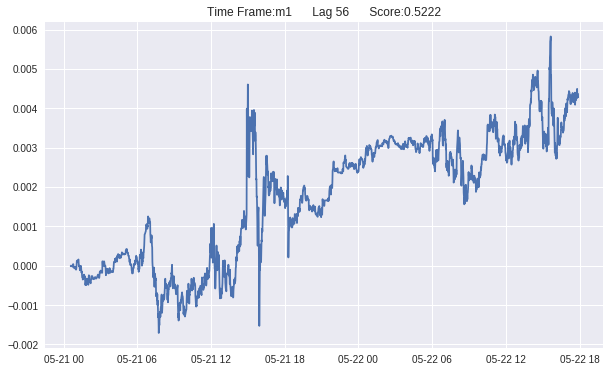

57
0.4876568191015783


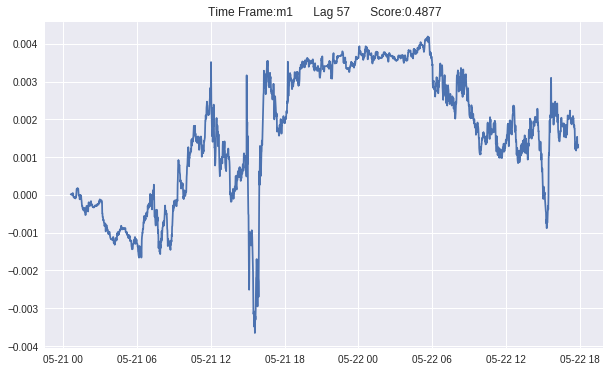

58
0.5022258195062728


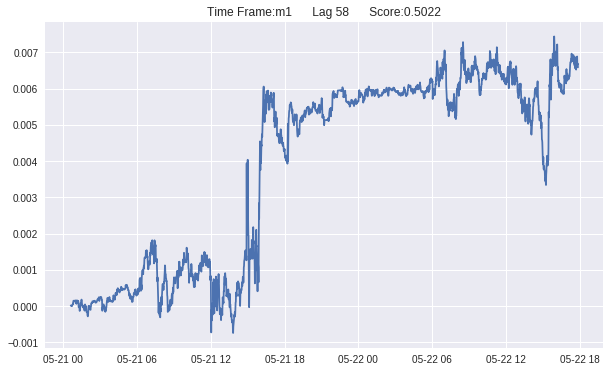

59
0.5360323886639676


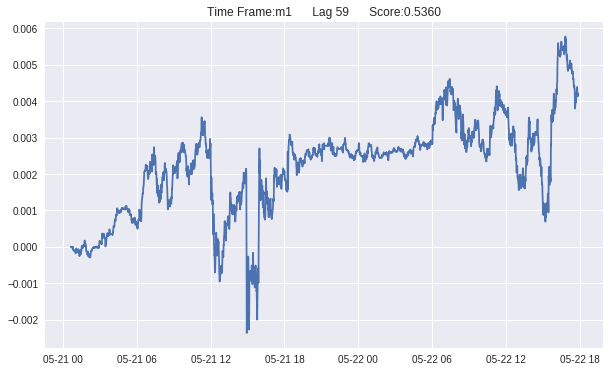

60
0.5530364372469636


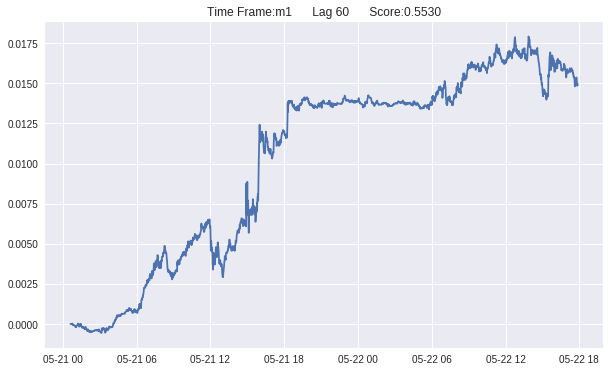

61
0.5455650060753341


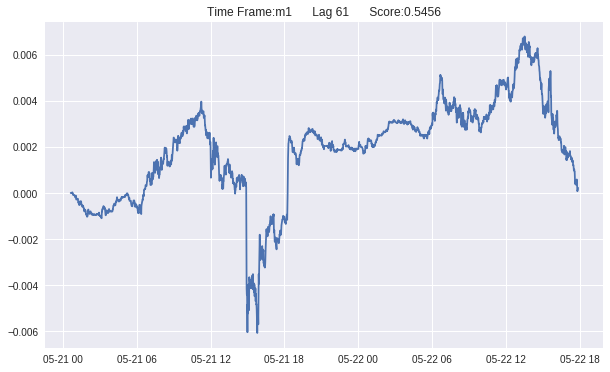

62
0.488456865127582


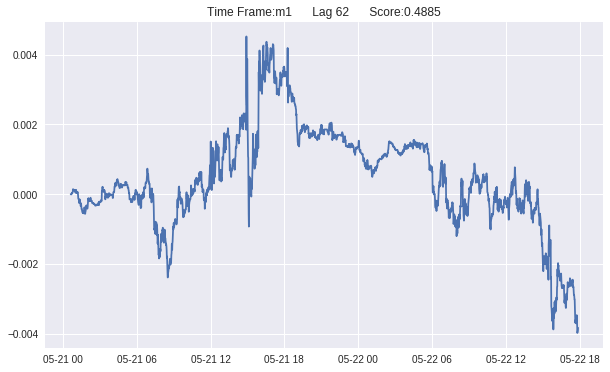

63
0.5052674230145867


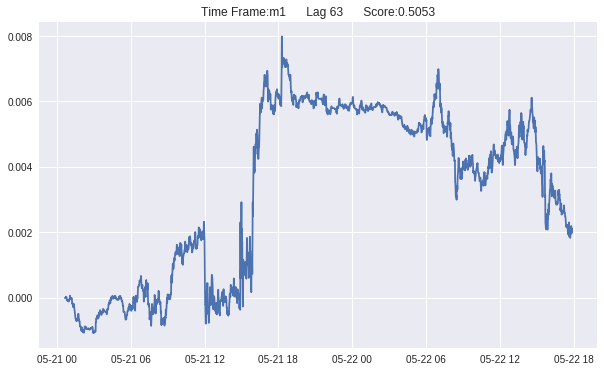

64
0.5494327390599676


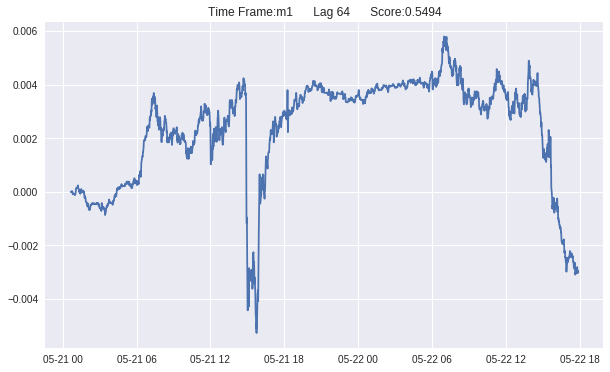

65
0.5318200243210377


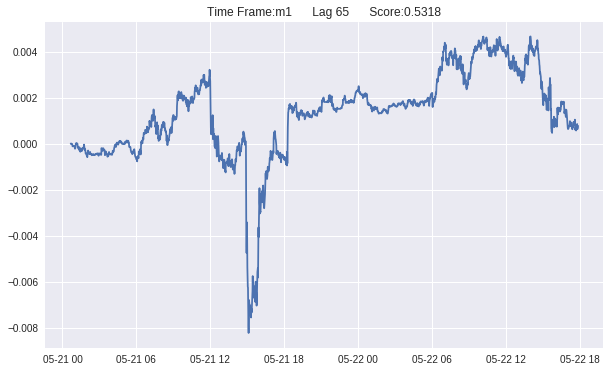

66
0.5496554519659506


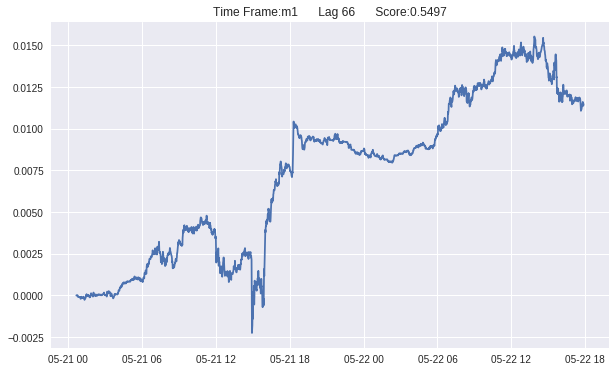

67
0.5389294403892944


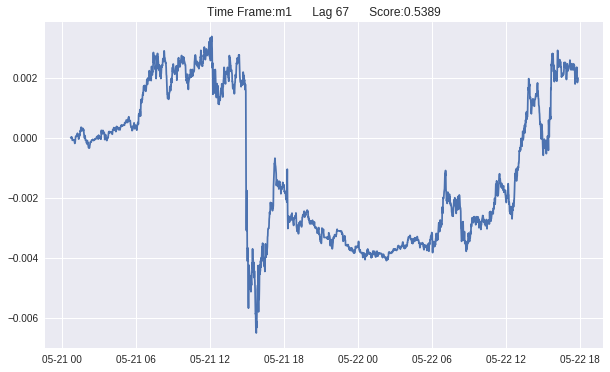

68
0.5279805352798054


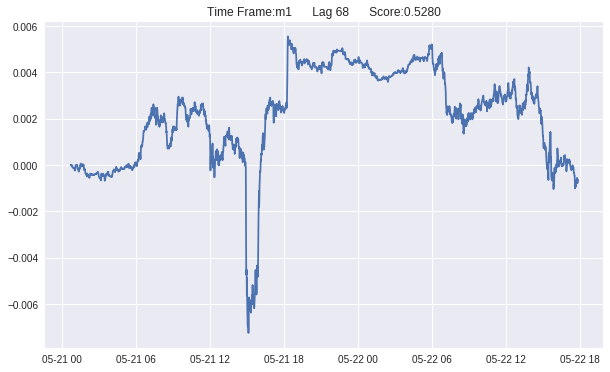

69
0.5415821501014199


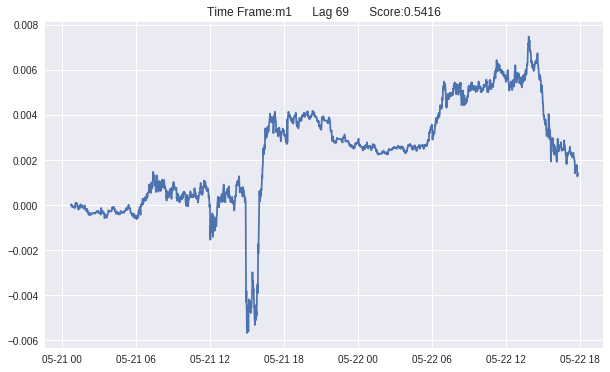

70
0.5513184584178499


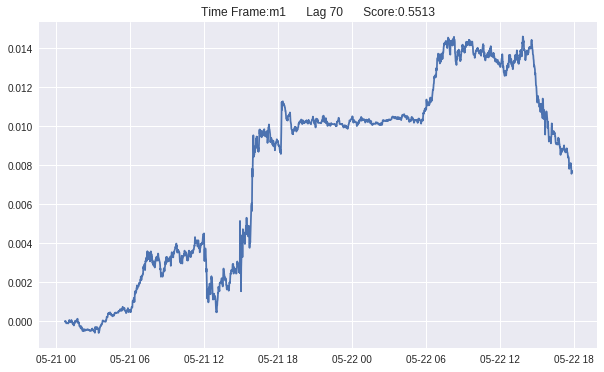

71
0.5564123376623377


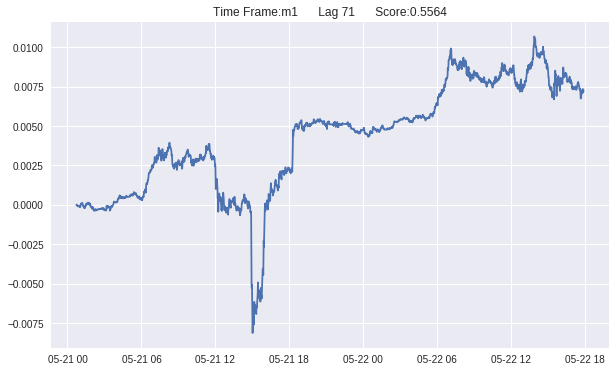

72
0.5349025974025974


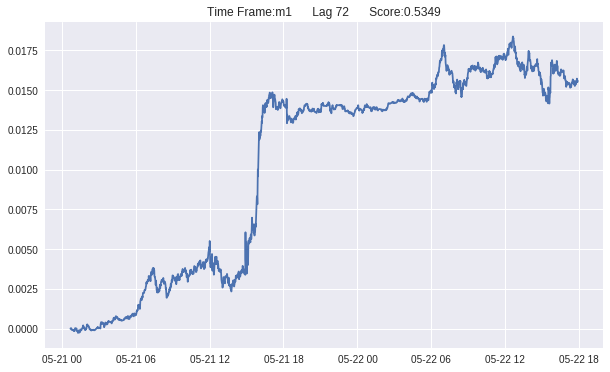

73
0.49573690621193667


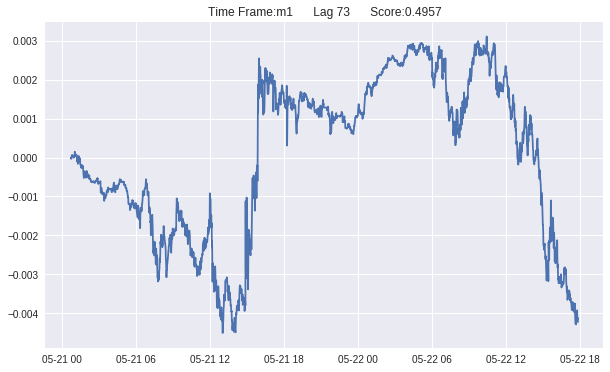

74
0.5286236297198539


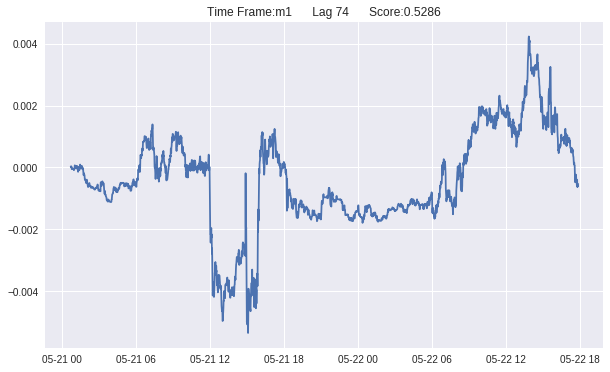

75
0.5402112103980503


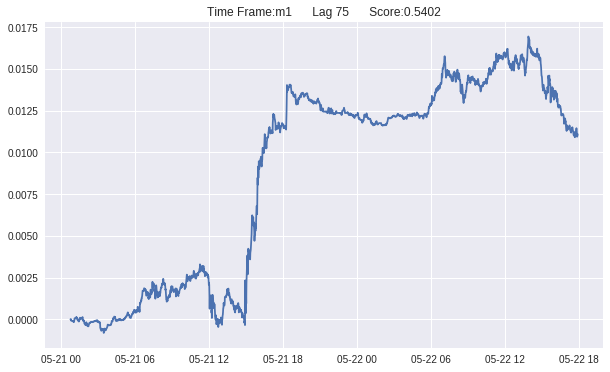

76
0.5064987814784728


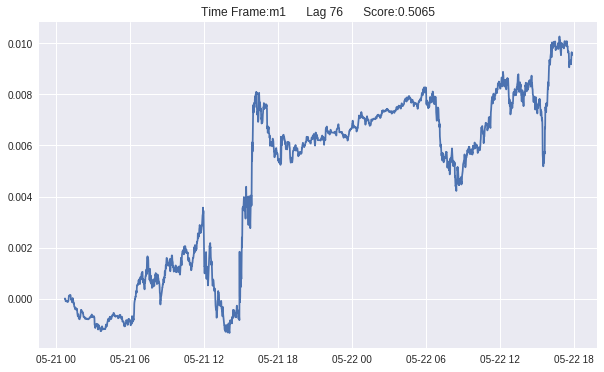

77
0.4685087362860626


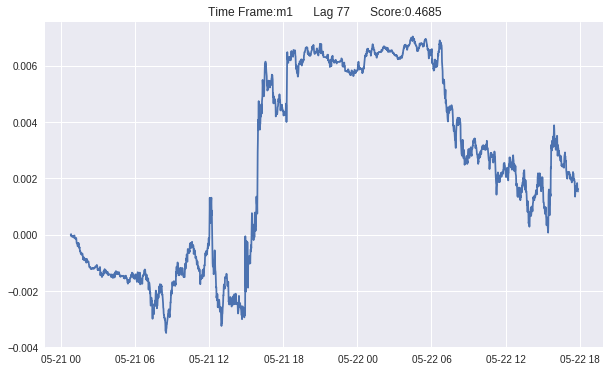

78
0.5229581470946769


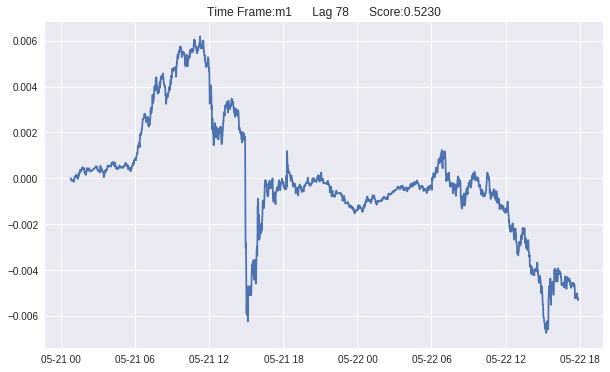

79
0.4853658536585366


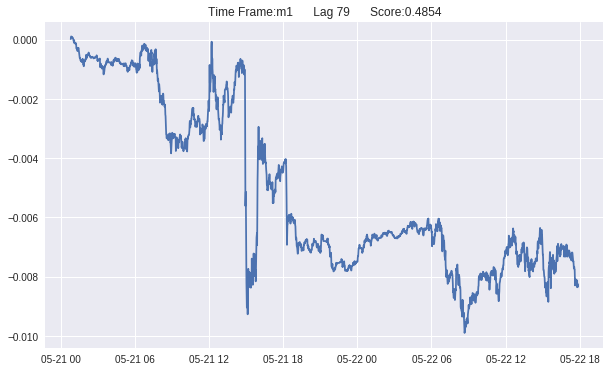

80
0.5138211382113821


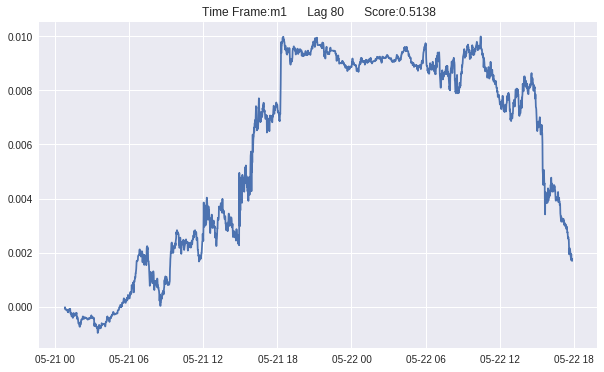

81
0.4961366409109394


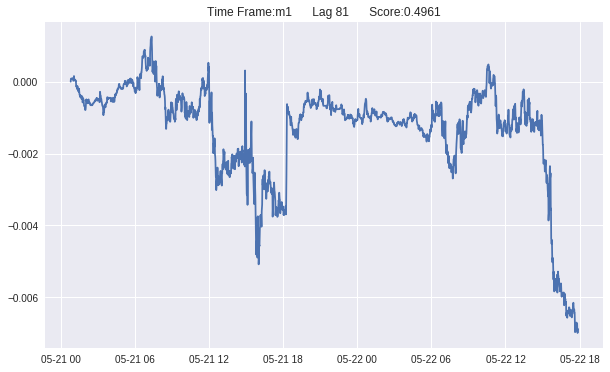

82
0.5213501423342822


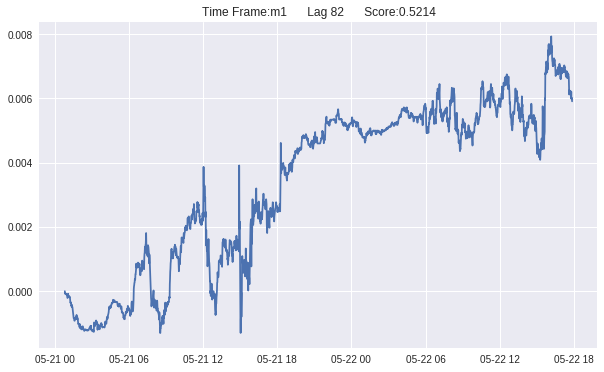

83
0.5301057770545159


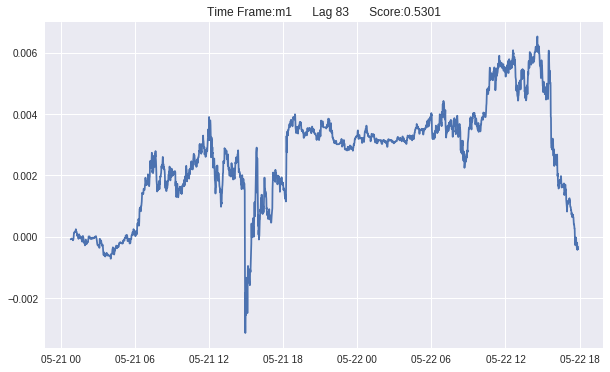

84
0.5463791700569569


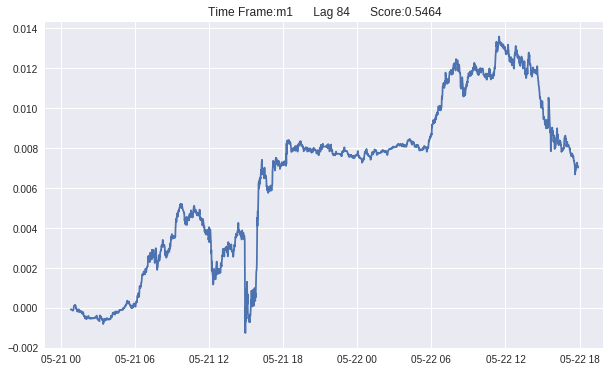

85
0.487993487993488


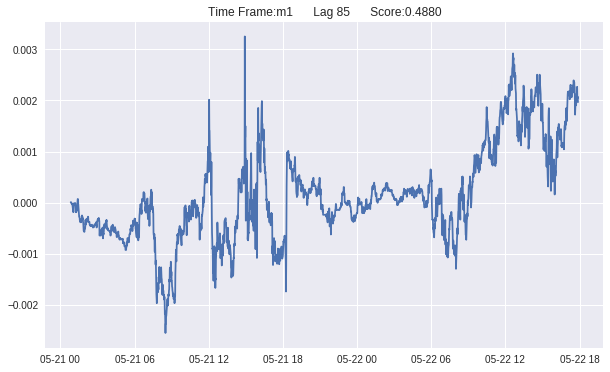

86
0.5095645095645096


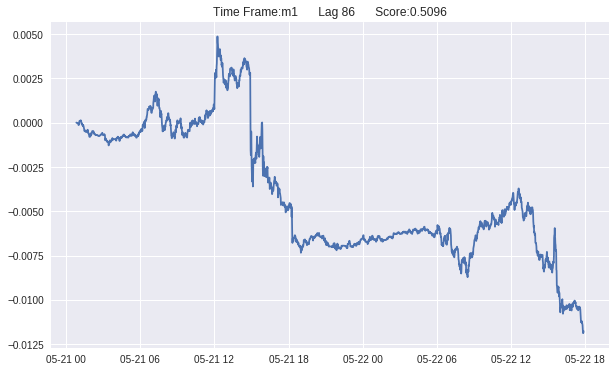

87
0.5354234527687296


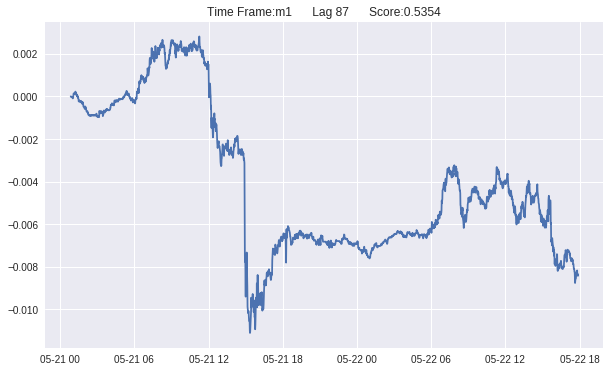

88
0.502442996742671


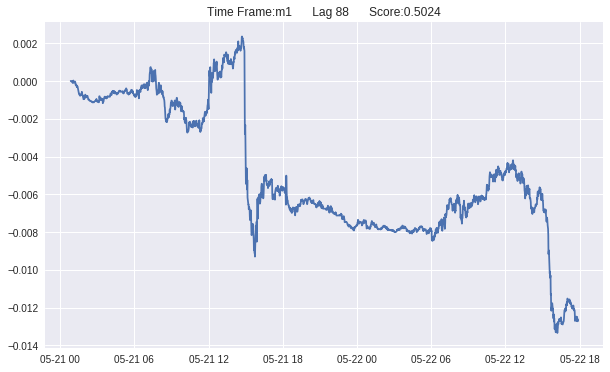

89
0.530346232179226


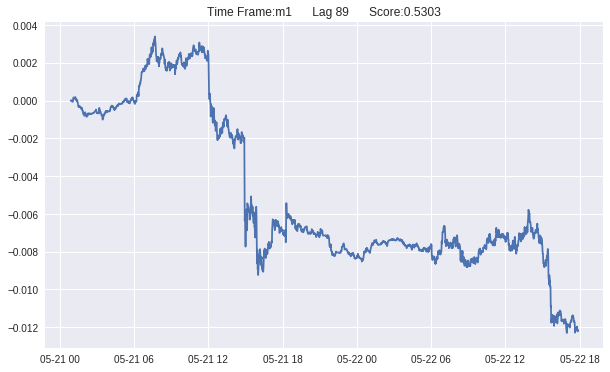

90
0.5295315682281059


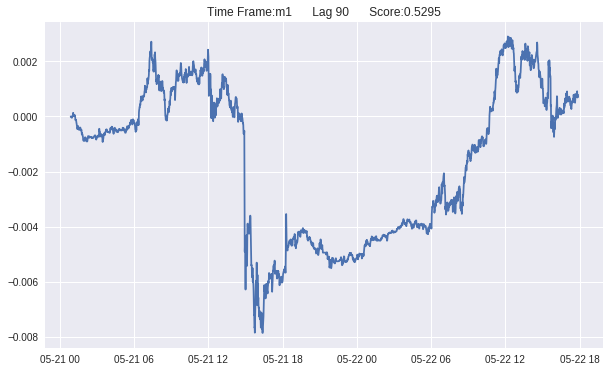

91
0.5236348818255909


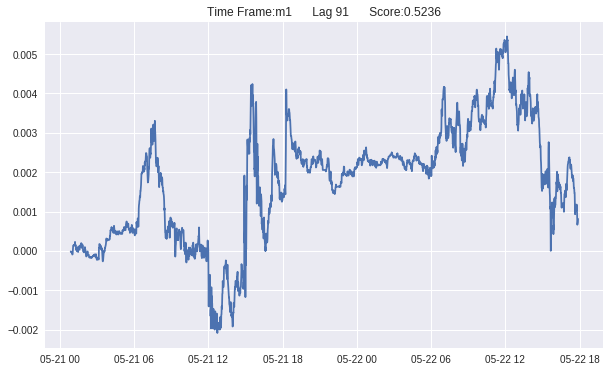

92
0.4902200488997555


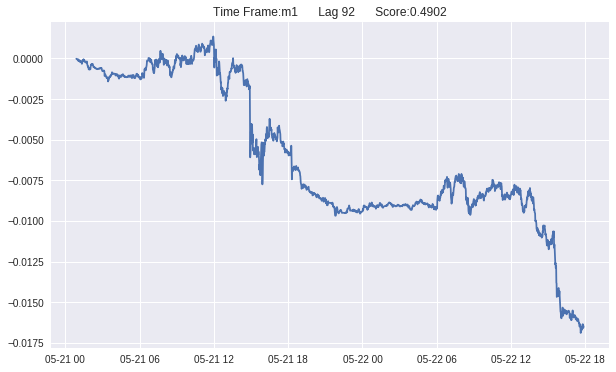

93
0.5099877700774562


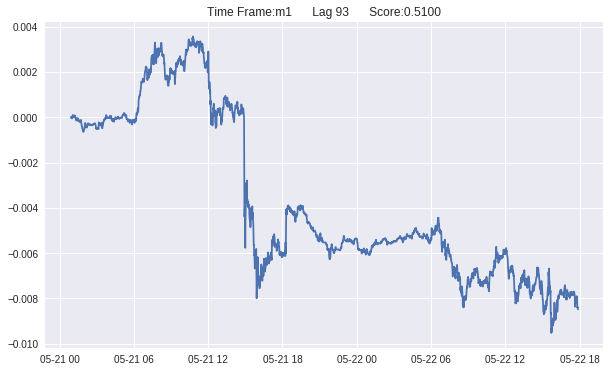

94
0.537708927843457


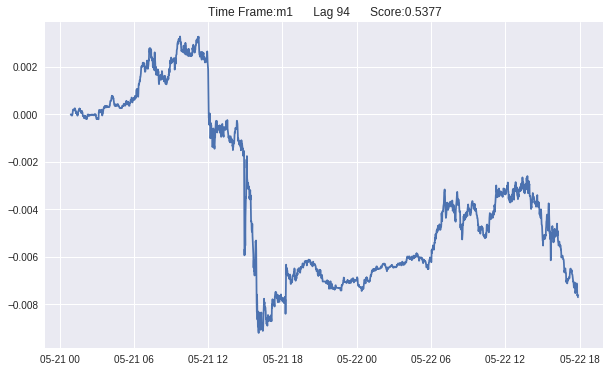

95
0.5456769983686787


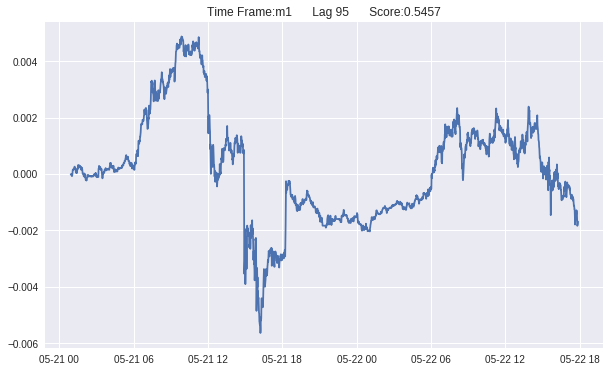

96
0.5199836867862969


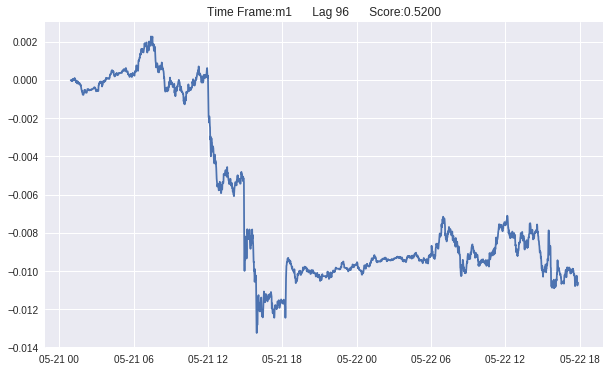

97
0.5157078743370053


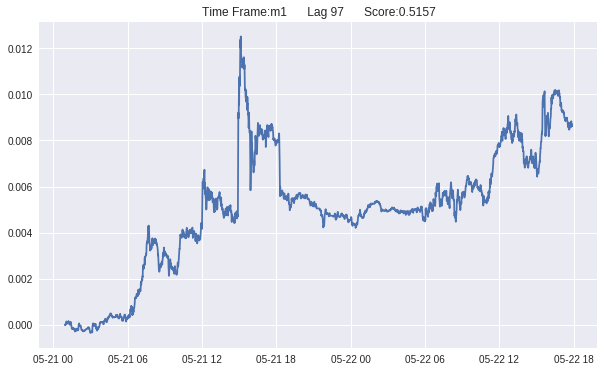

98
0.514483884128927


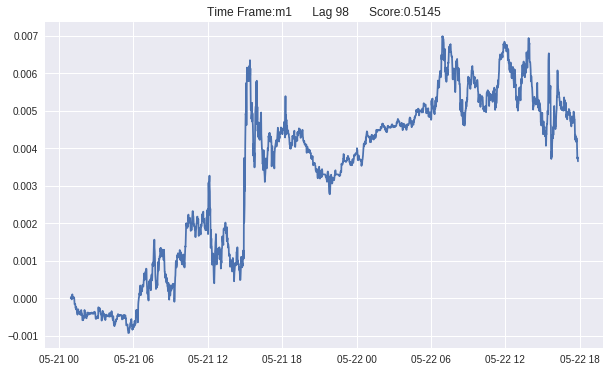

3
0.5340272217774219


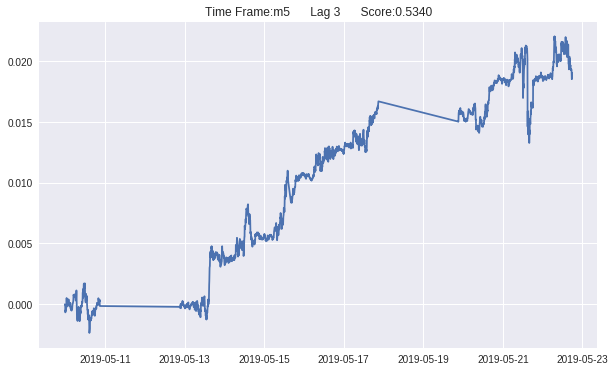

4
0.5256204963971177


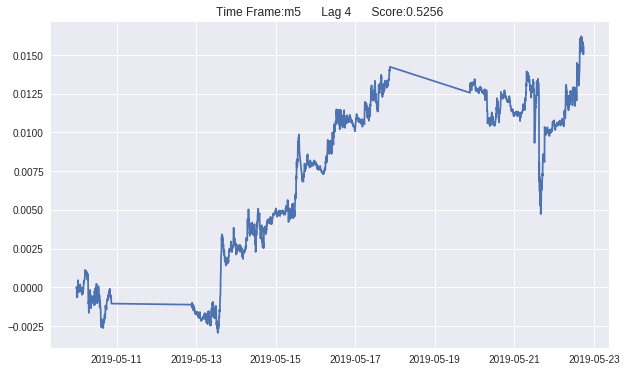

5
0.5250300360432519


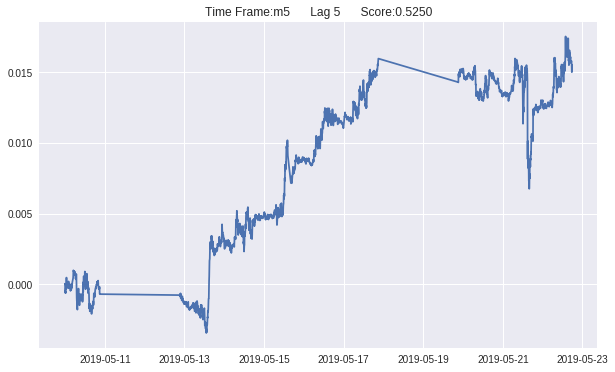

6
0.5190228273928714


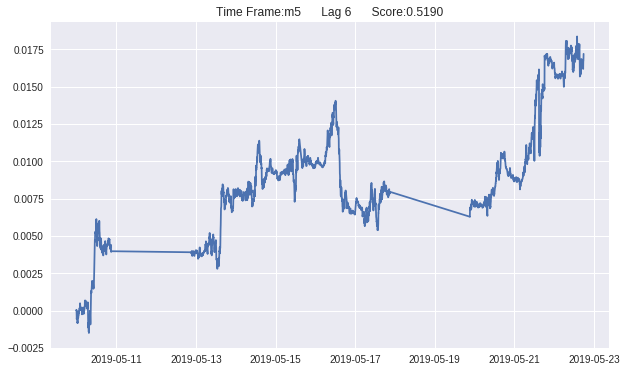

7
0.5044070512820513


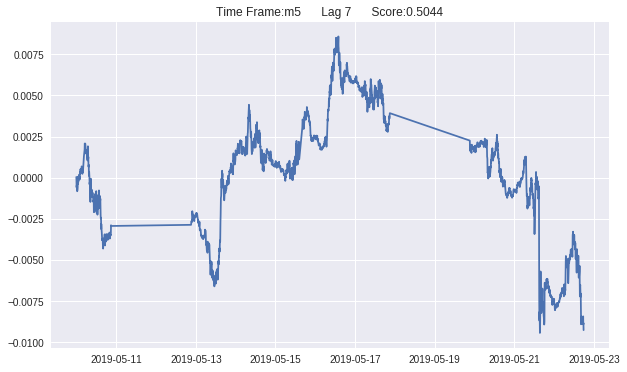

8
0.5064102564102564


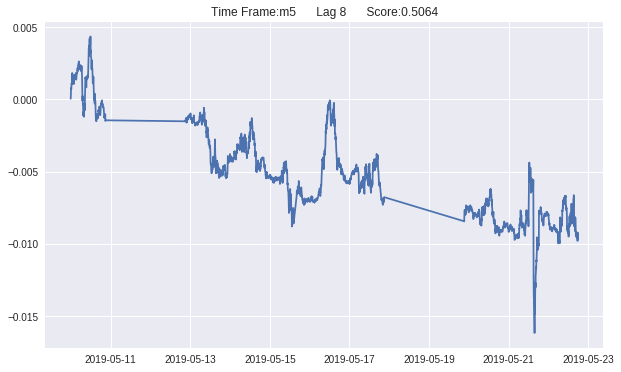

9
0.5230460921843687


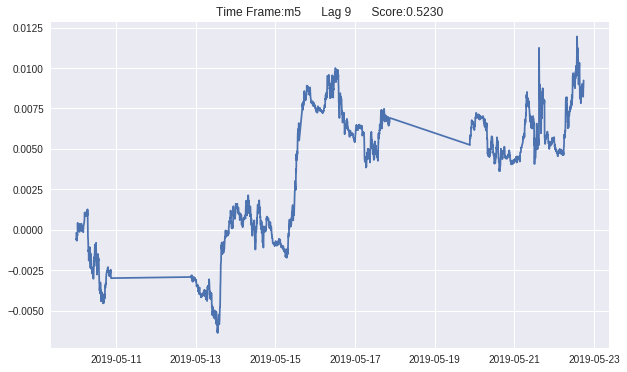

10
0.49218436873747495


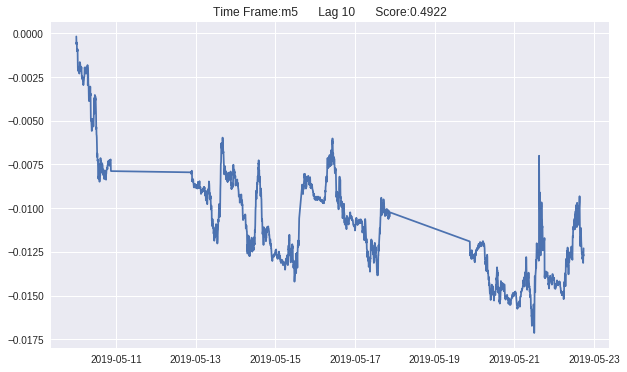

11
0.5088211708099438


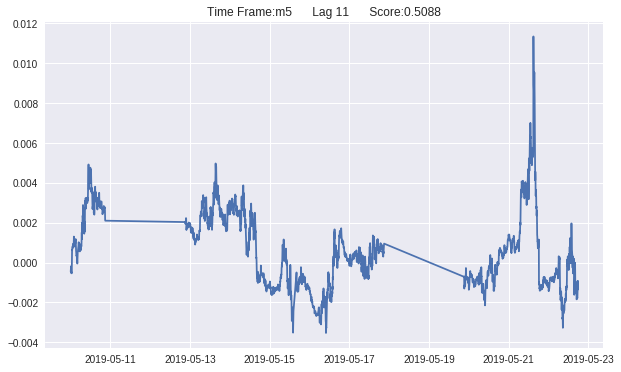

12
0.48757016840417


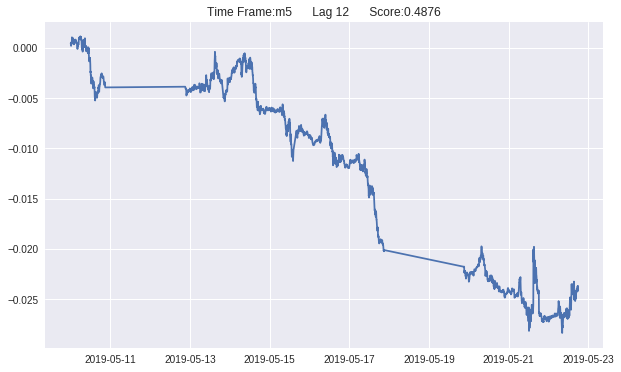

13
0.49338146811071


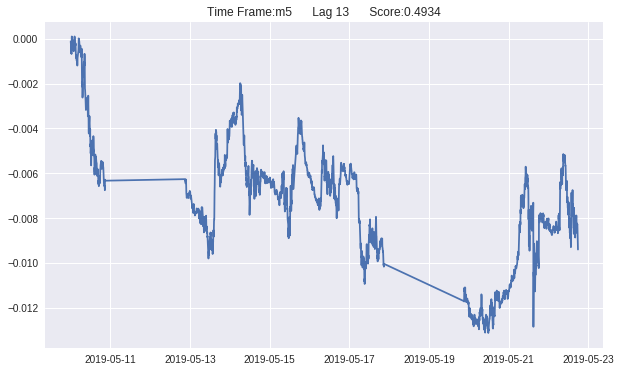

14
0.5106297633373446


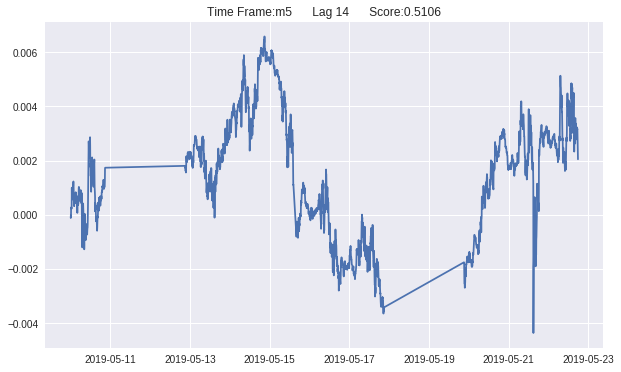

15
0.5100321027287319


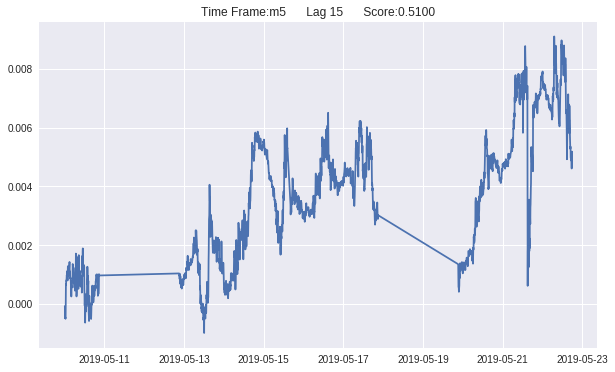

16
0.5156500802568218


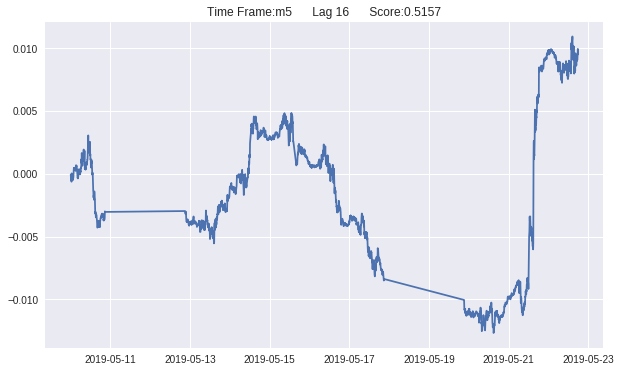

17
0.5106382978723404


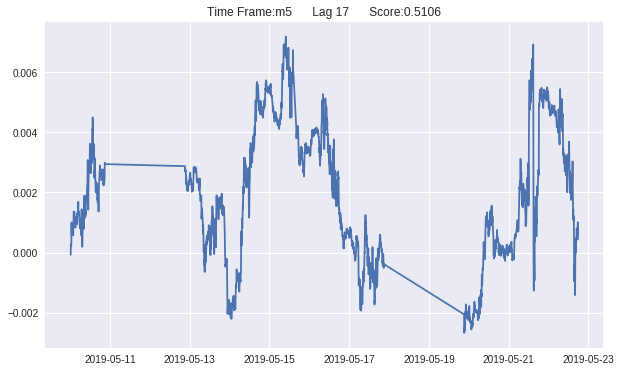

18
0.5042151746286632


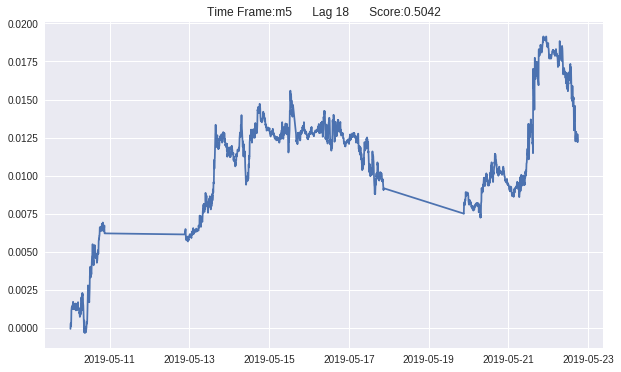

19
0.5152610441767068


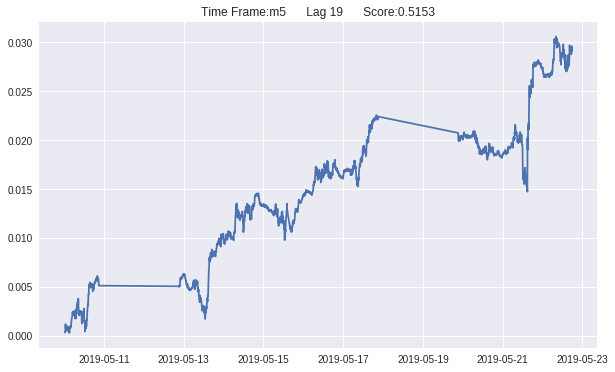

20
0.4931726907630522


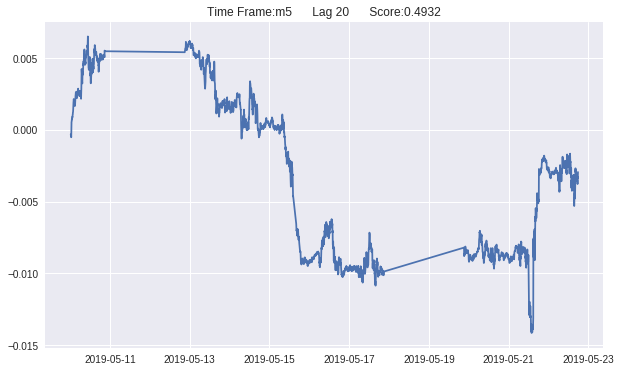

21
0.5078344716753717


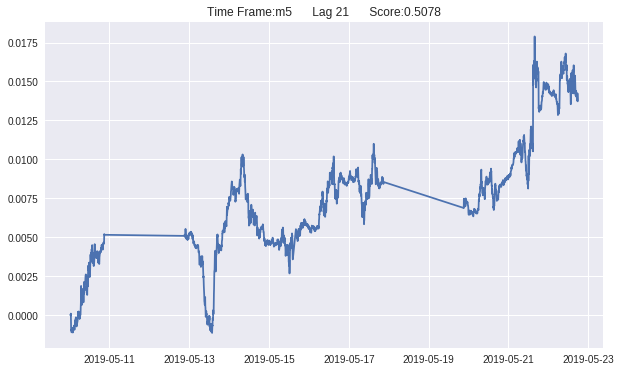

22
0.5142627561269586


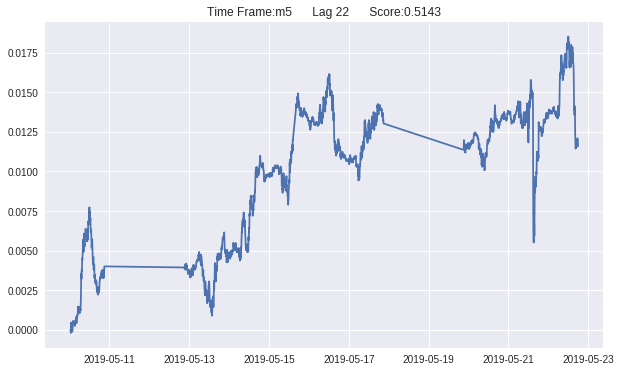

23
0.5028135048231511


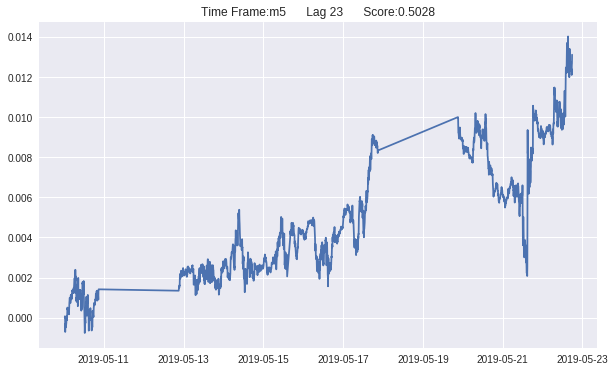

24
0.5156752411575563


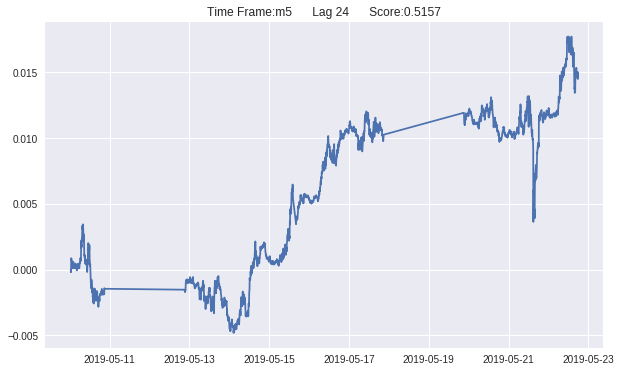

25
0.5054282267792521


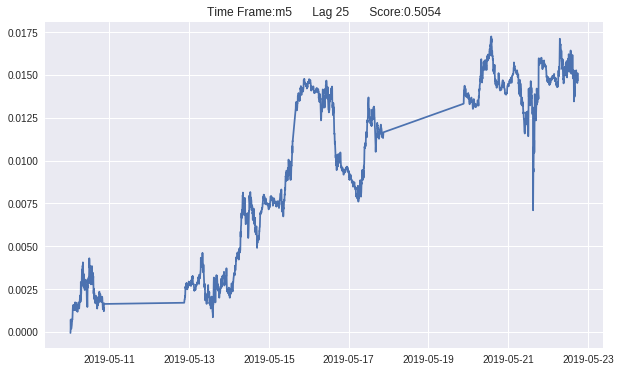

26
0.5190993164455167


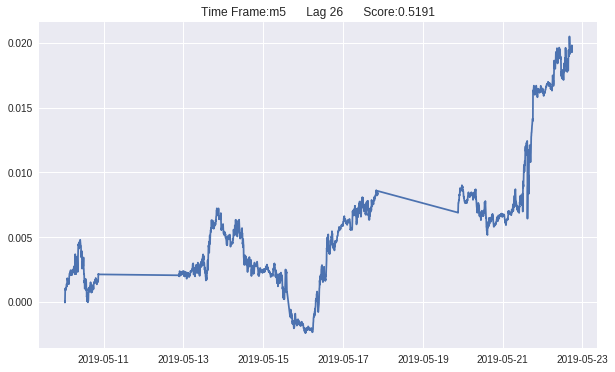

27
0.5221238938053098


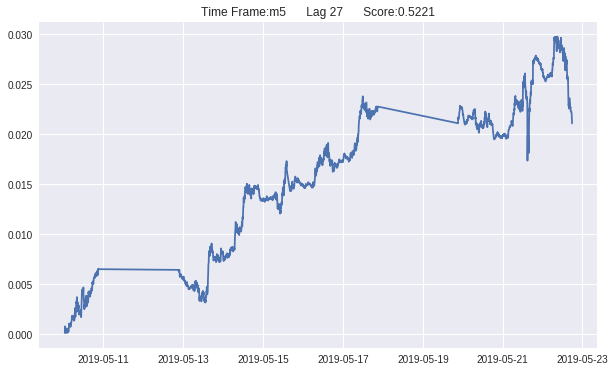

28
0.5185036202735318


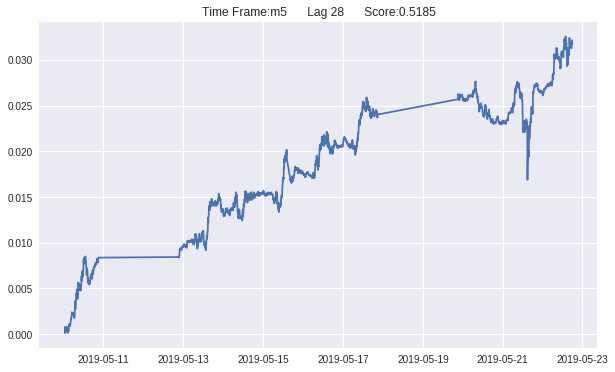

29
0.5098591549295775


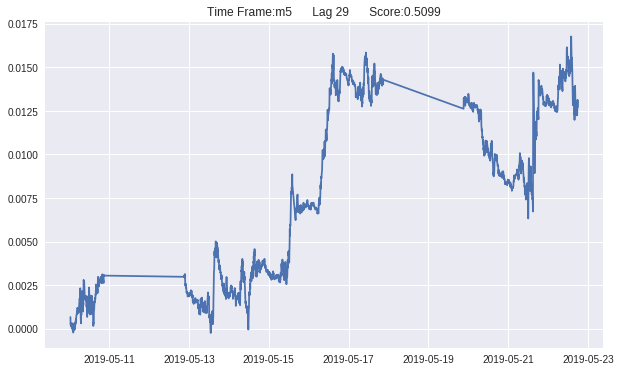

30
0.5255533199195171


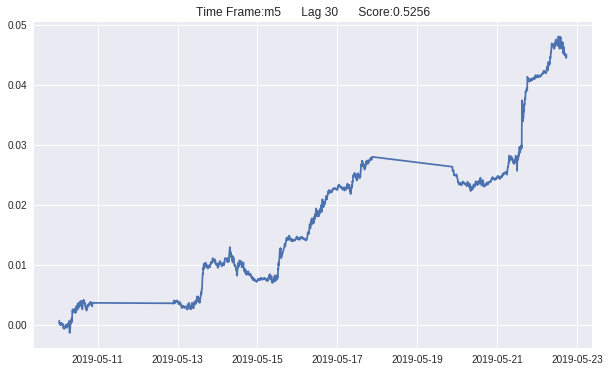

31
0.5277777777777778


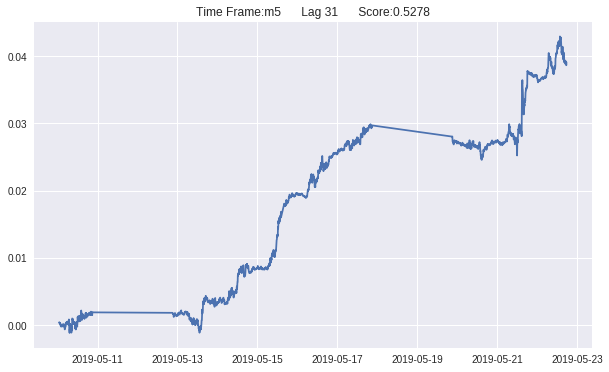

32
0.5205314009661836


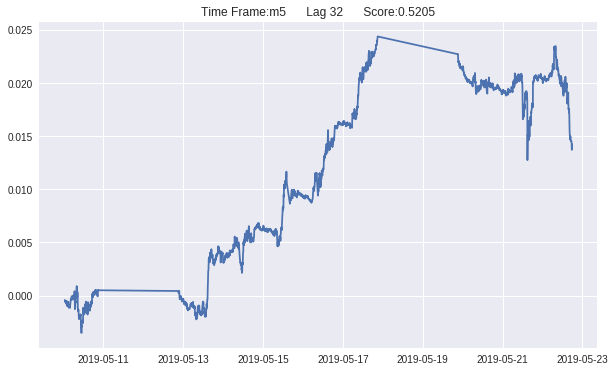

33
0.5130890052356021


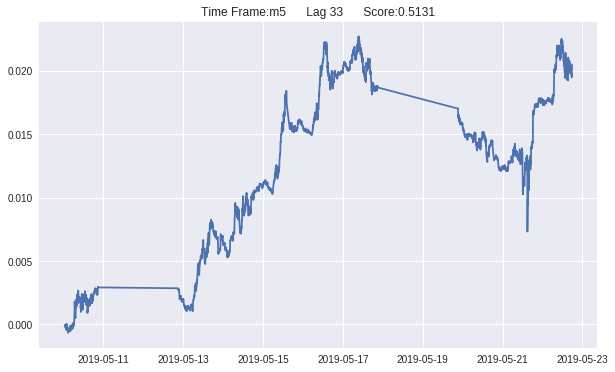

34
0.5082561417639951


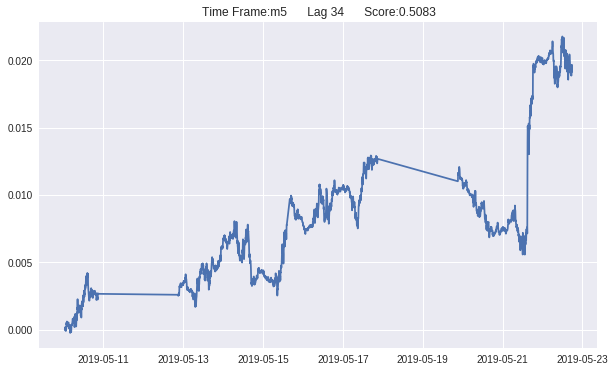

35
0.5201450443190975


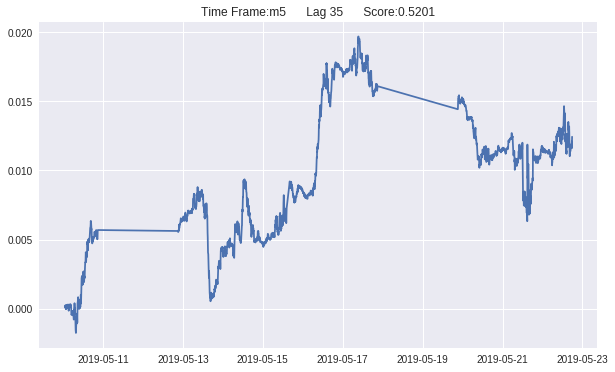

36
0.5221595487510072


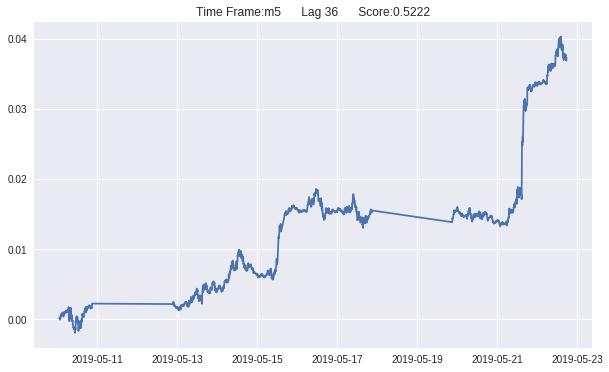

37
0.5139056831922612


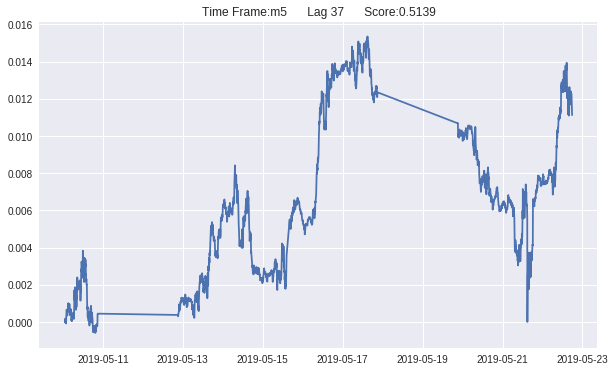

38
0.5030229746070133


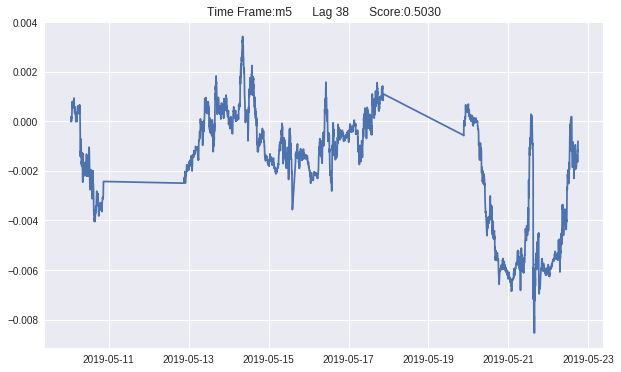

39
0.5060483870967742


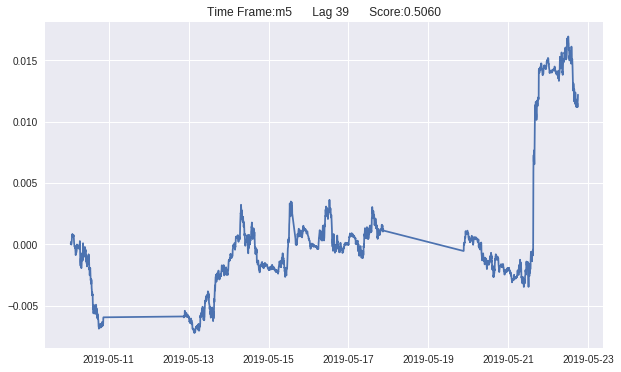

40
0.5173387096774194


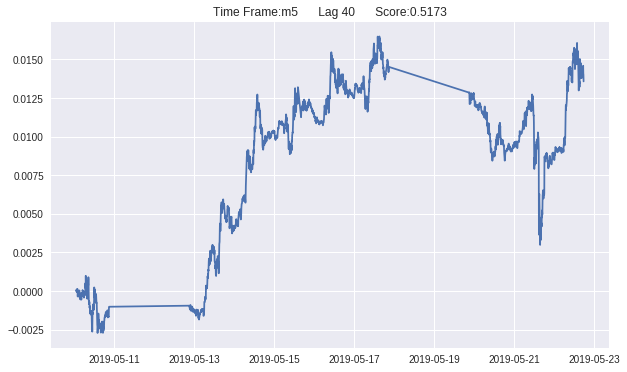

41
0.5118999596611536


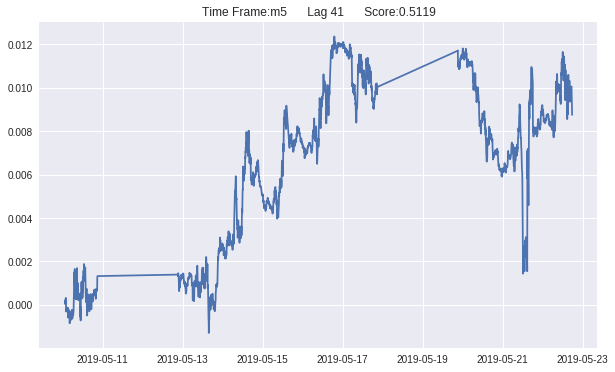

42
0.4953610326744655


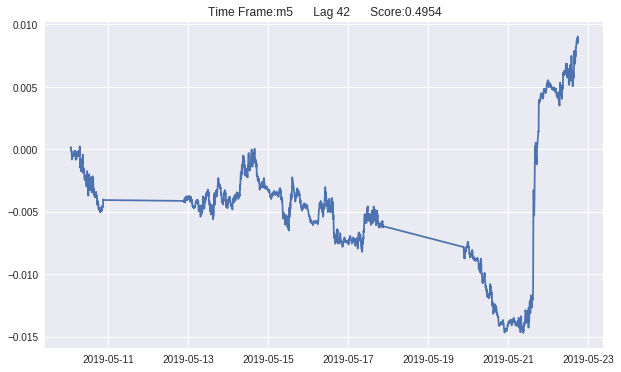

43
0.5032284100080711


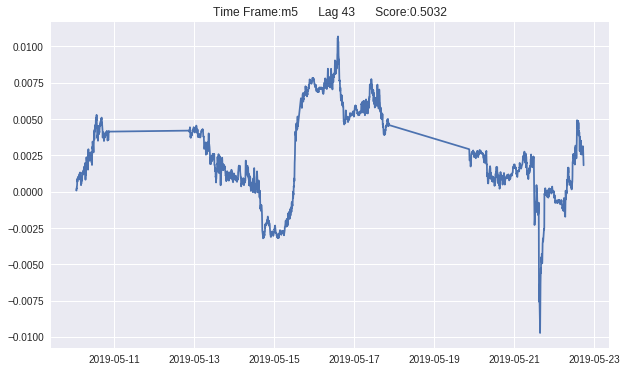

44
0.49919289749798224


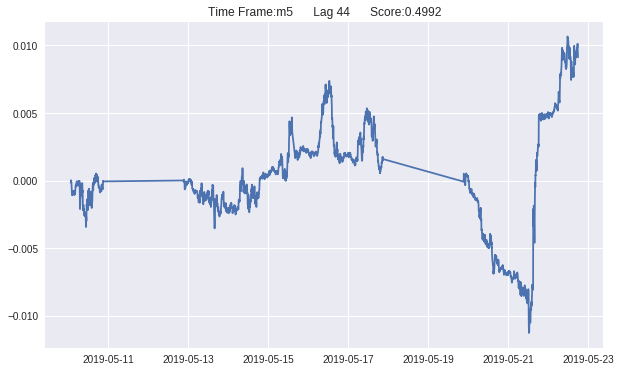

45
0.49454985870004037


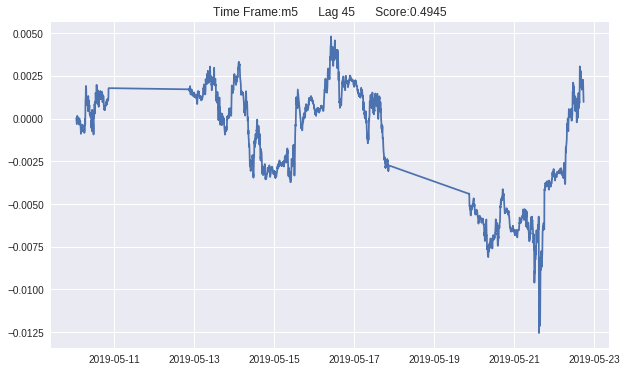

46
0.49979814291481633


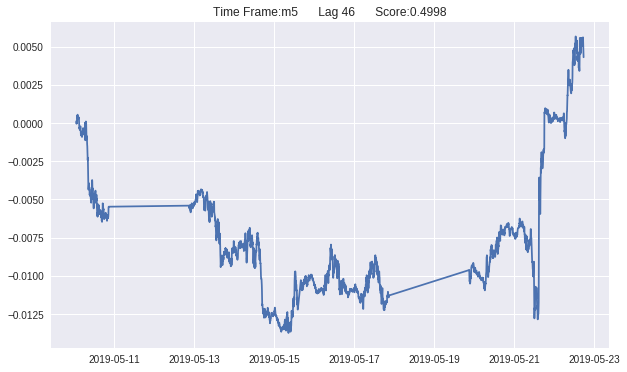

47
0.5084814216478191


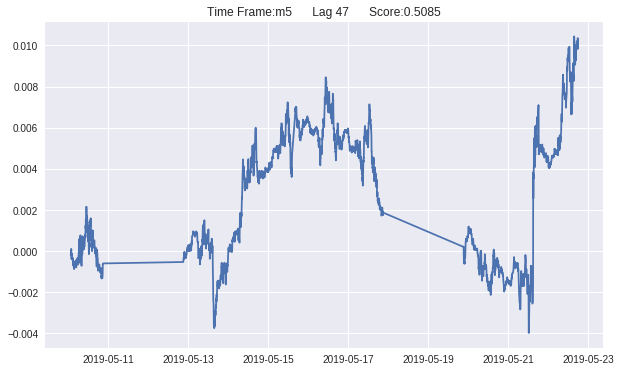

48
0.5060581583198708


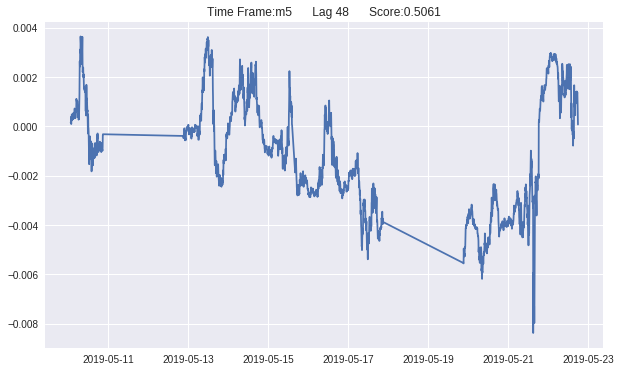

49
0.5050505050505051


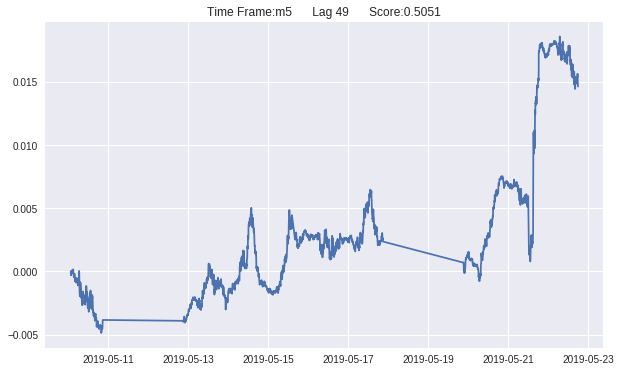

50
0.5066666666666667


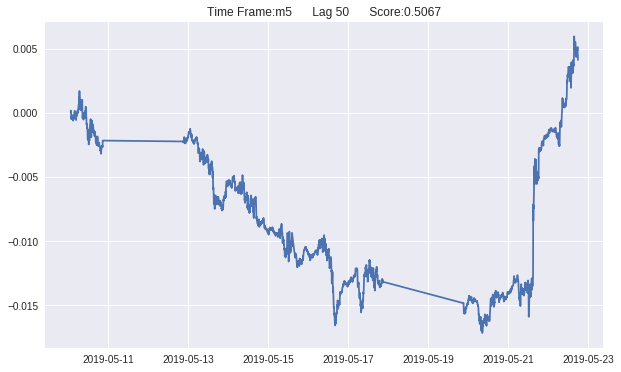

51
0.5024252223120452


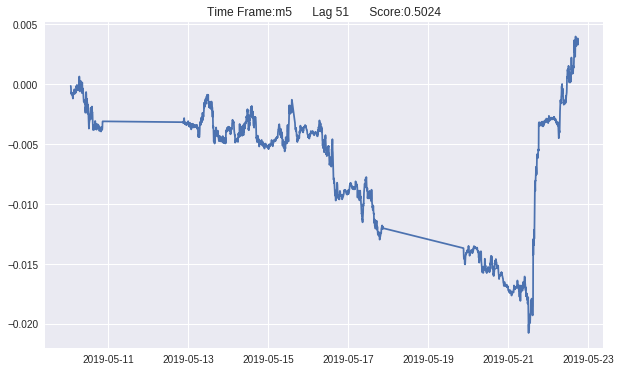

52
0.50767987065481


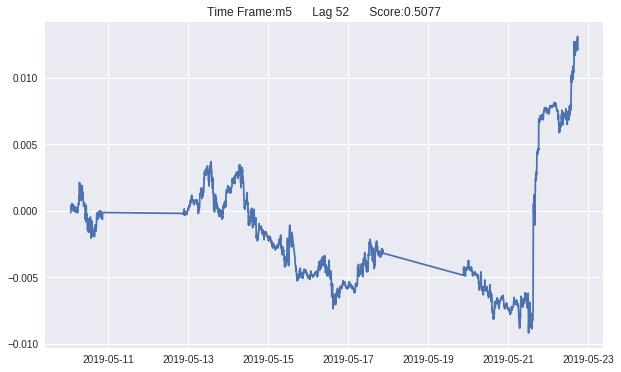

53
0.5103113627173473


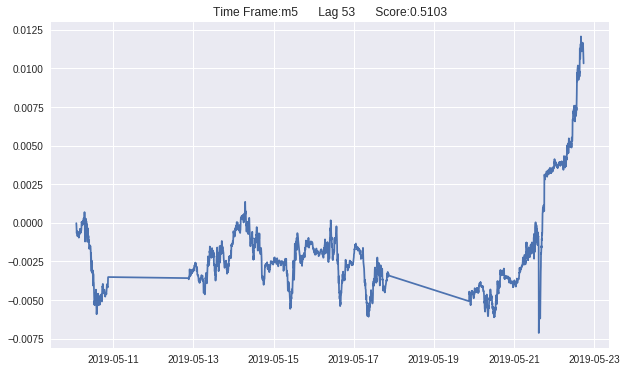

54
0.5086938940558027


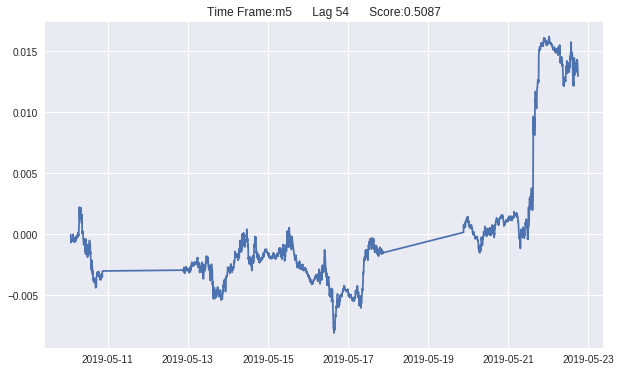

55
0.5048543689320388


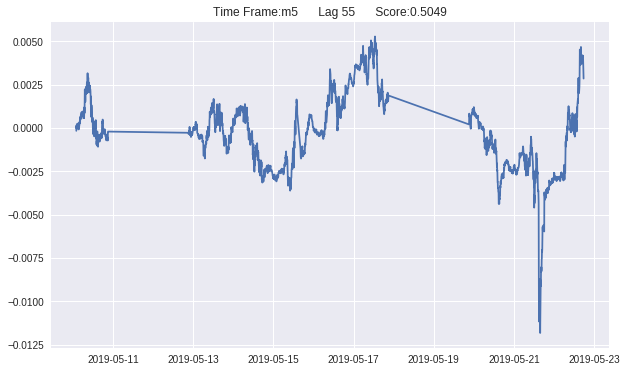

56
0.5


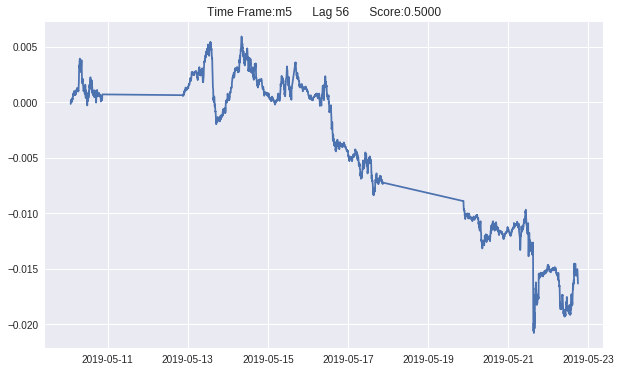

57
0.49291784702549574


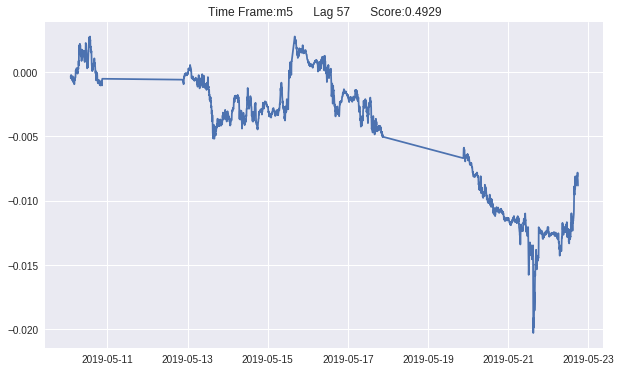

58
0.5180089032780251


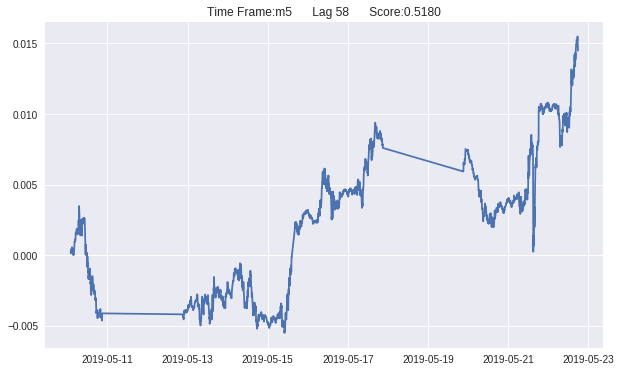

59
0.5161943319838057


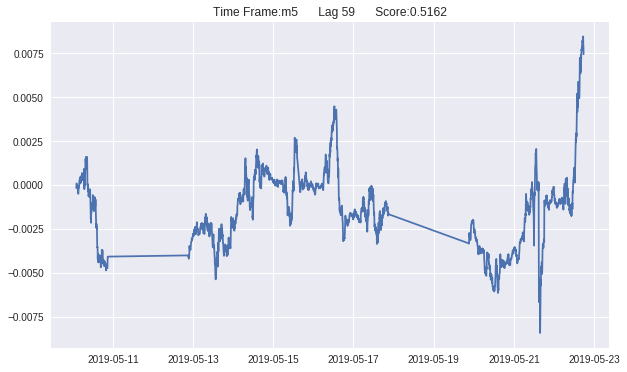

60
0.5004048582995951


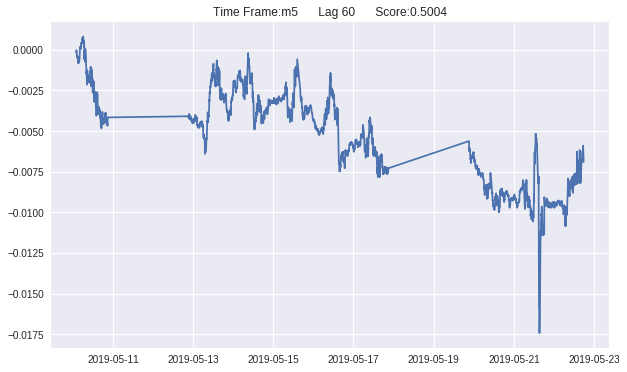

61
0.5151883353584447


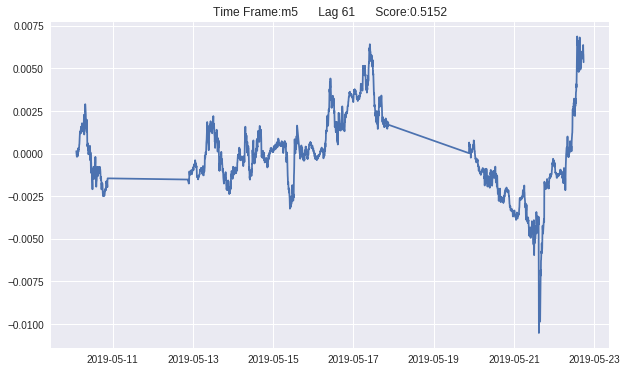

62
0.5127582017010935


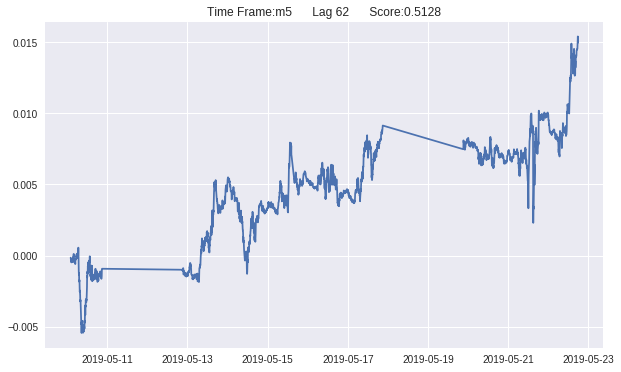

63
0.5072933549432739


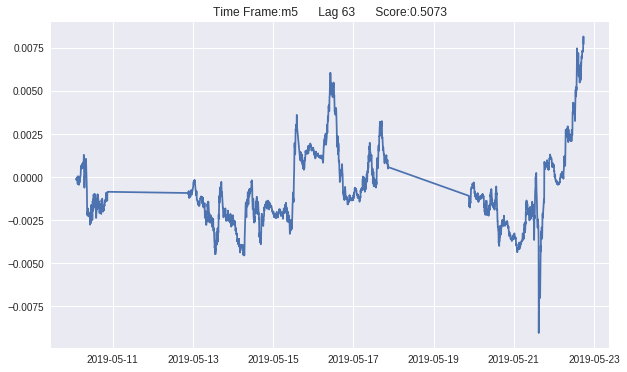

64
0.513776337115073


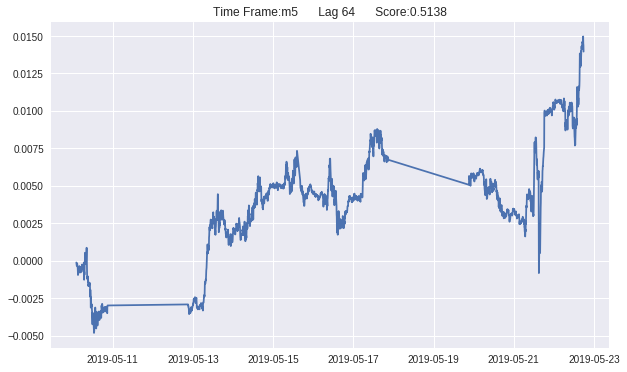

65
0.5054722334819619


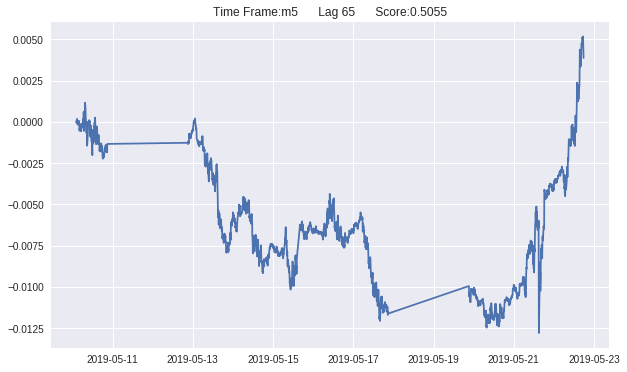

66
0.5403323875152006


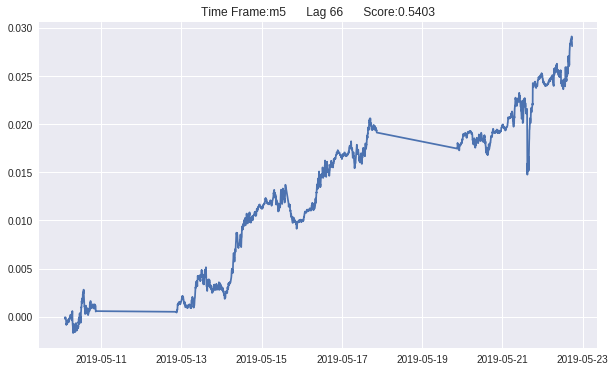

67
0.5259529602595296


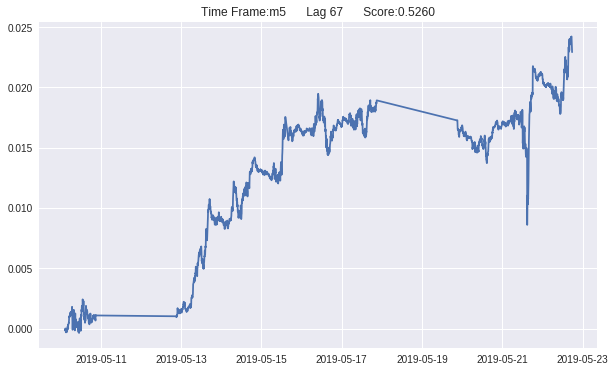

68
0.5117599351175993


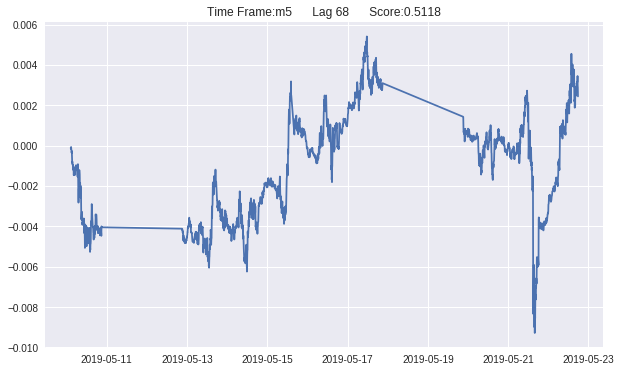

69
0.5192697768762677


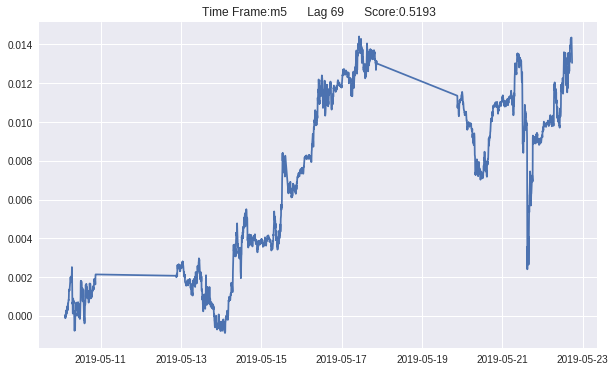

70
0.5221095334685598


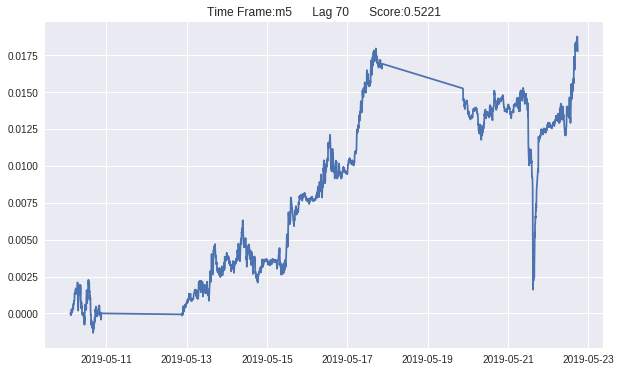

71
0.523538961038961


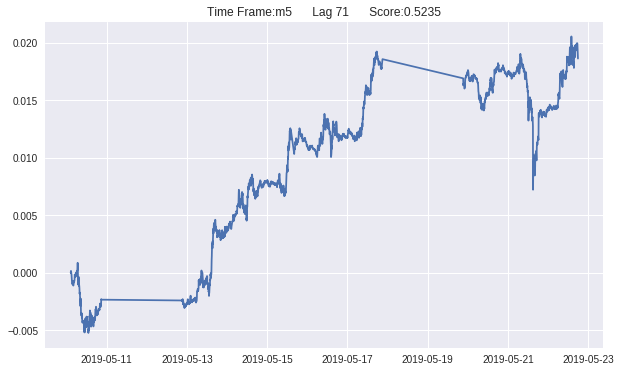

72
0.5008116883116883


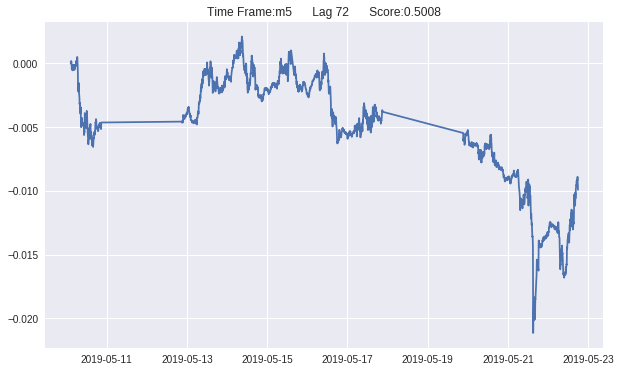

73
0.5058871295168493


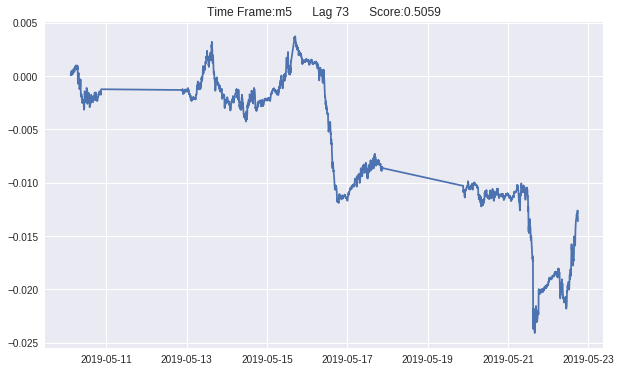

74
0.5172553796183516


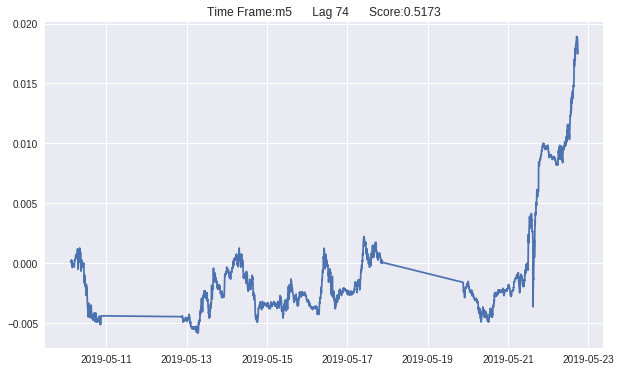

75
0.5158407798537774


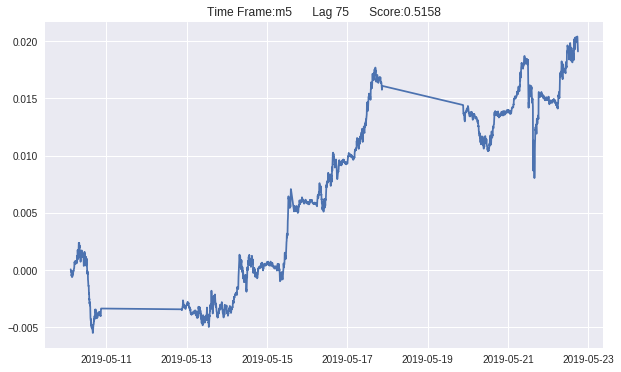

76
0.5146222583265637


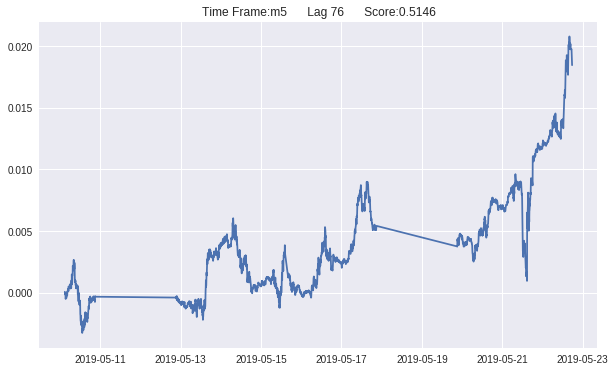

77
0.5172694026818366


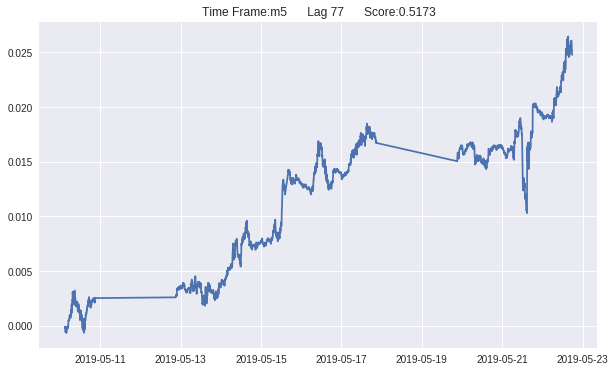

78
0.5213327915481512


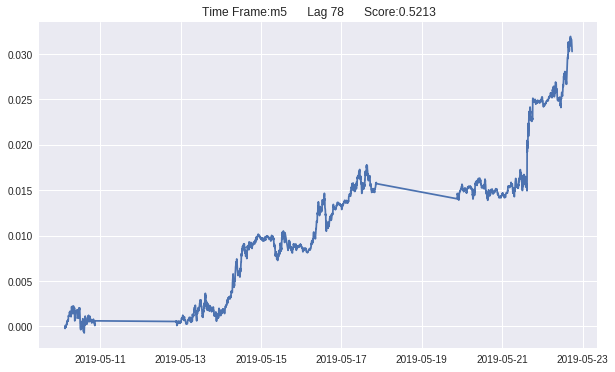

79
0.509349593495935


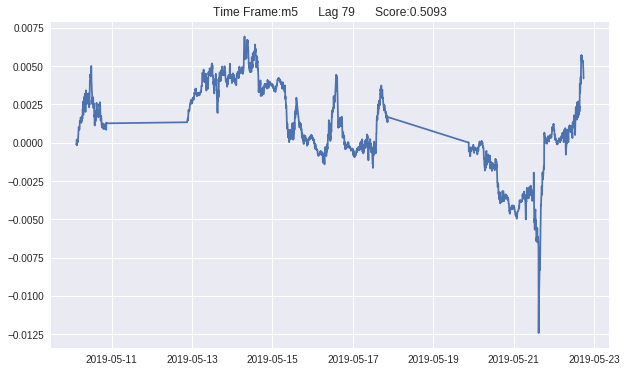

80
0.5056910569105691


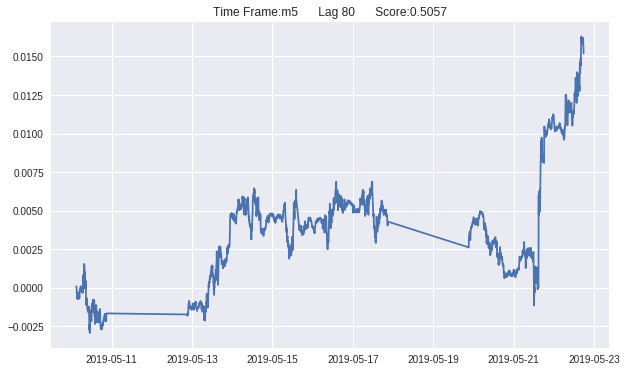

81
0.513623424156161


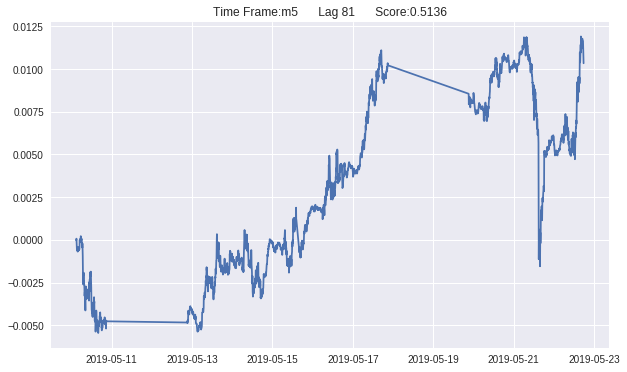

82
0.5327368849125661


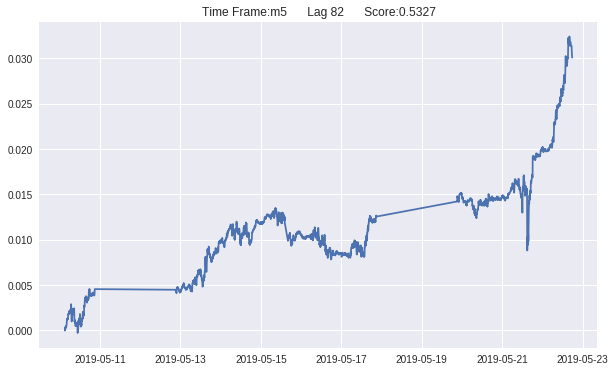

83
0.5211554109031733


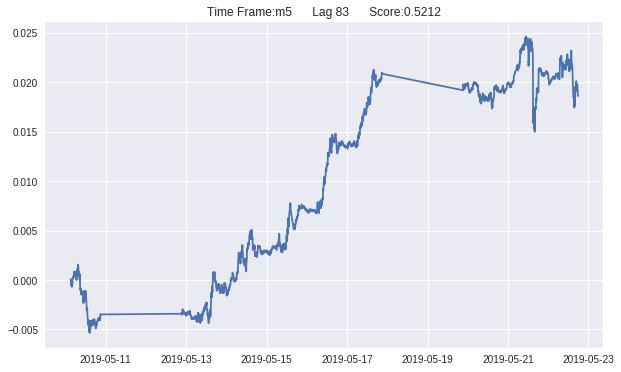

84
0.5309194467046379


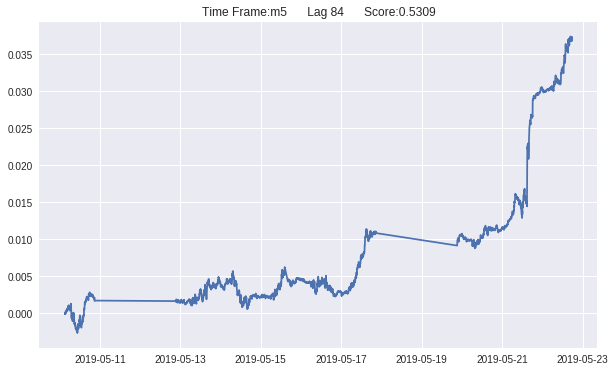

85
0.48677248677248675


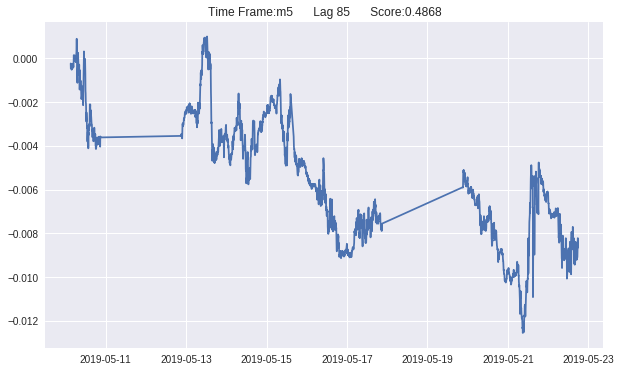

86
0.5217745217745218


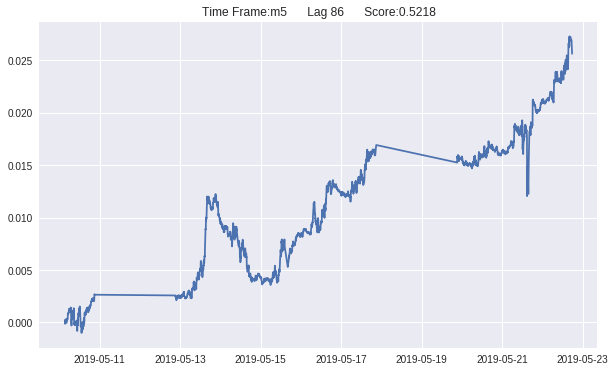

87
0.5272801302931596


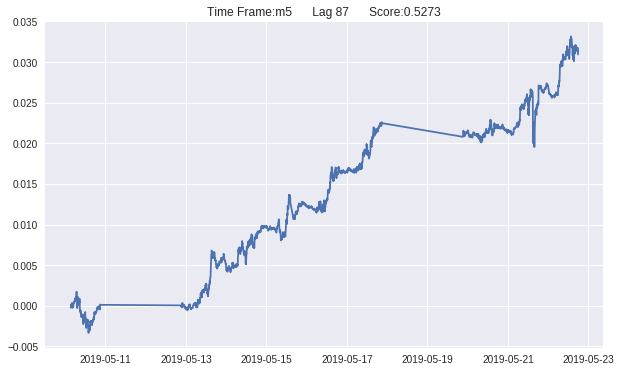

88
0.5195439739413681


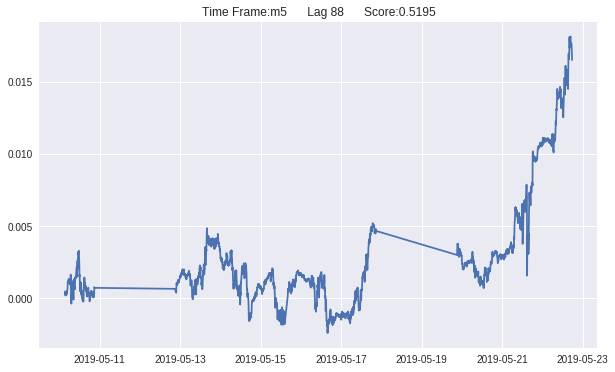

89
0.5242362525458248


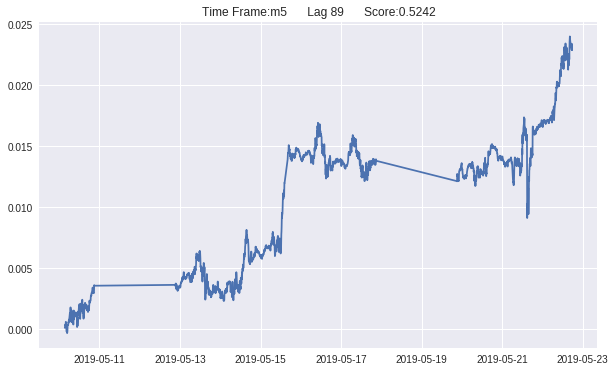

90
0.509979633401222


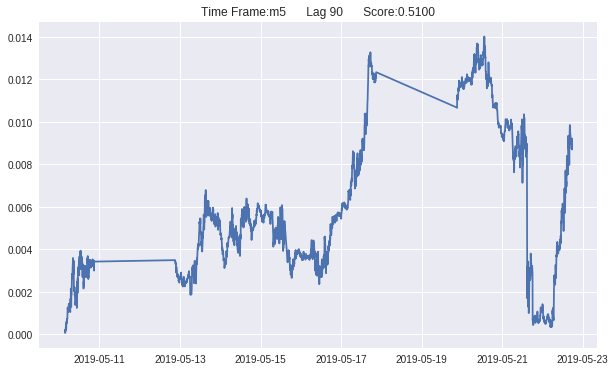

91
0.5138549307253464


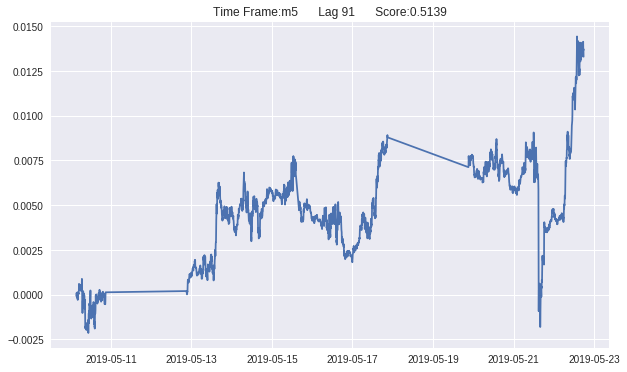

92
0.5220048899755502


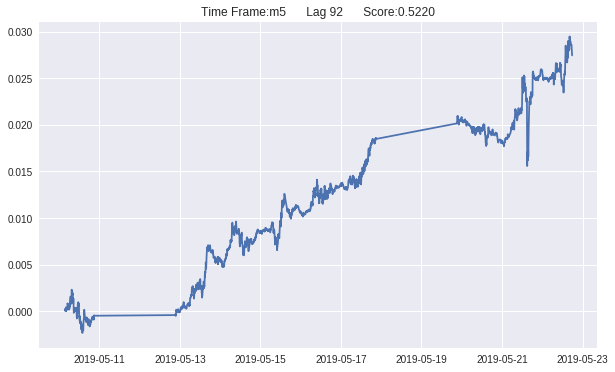

93
0.52221769262128


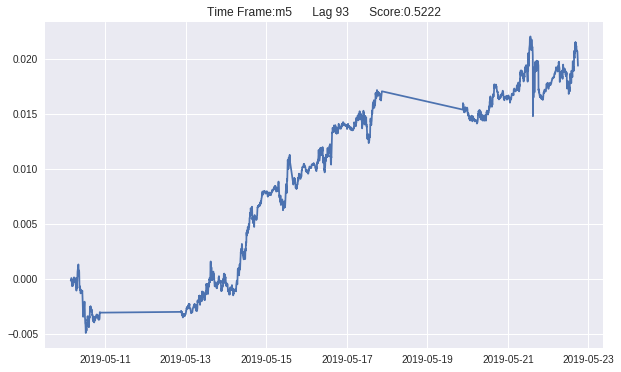

94
0.5230330207908683


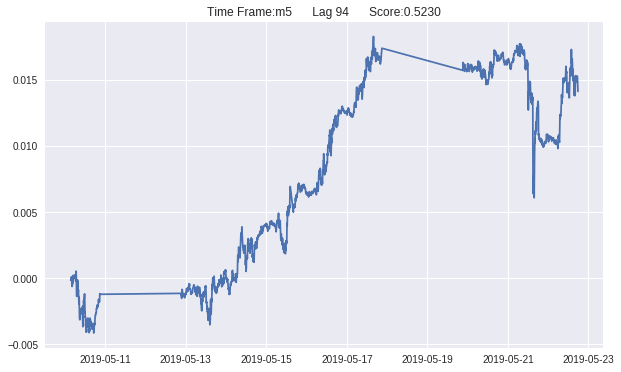

95
0.5289559543230016


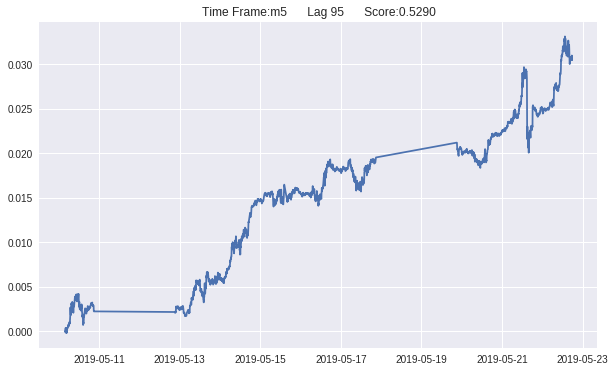

96
0.5163132137030995


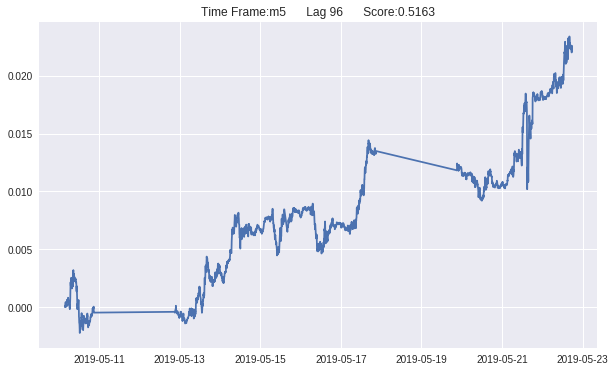

97
0.5165238678090576


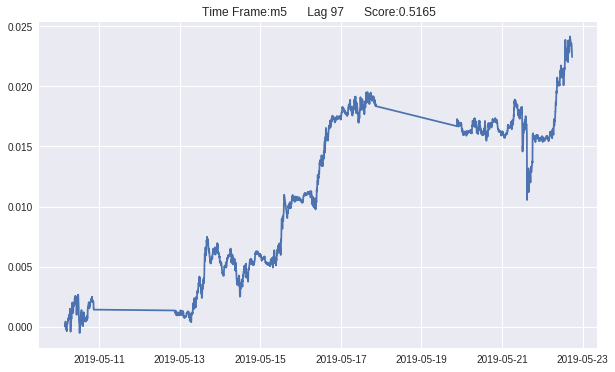

98
0.5308037535699714


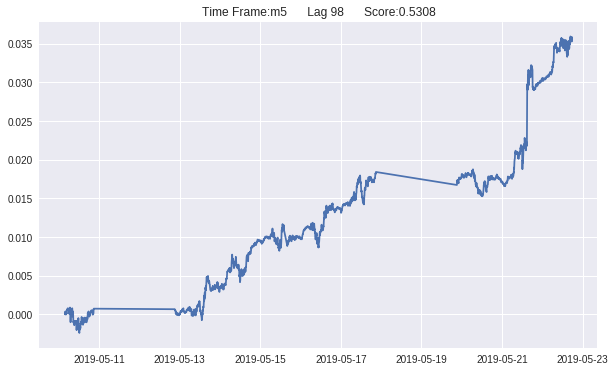

3
0.5028022417934348


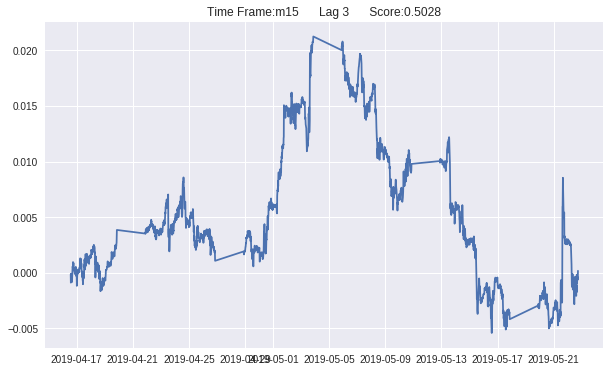

4
0.48158526821457165


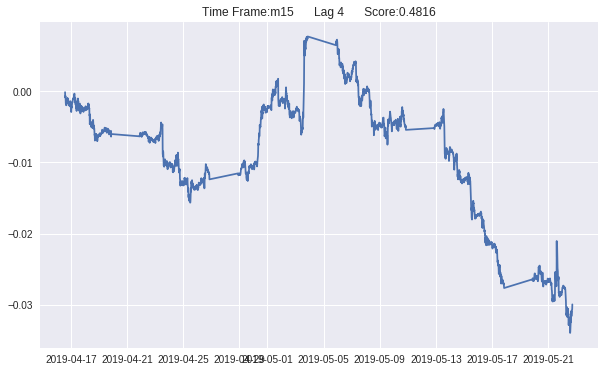

5
0.4817781337605126


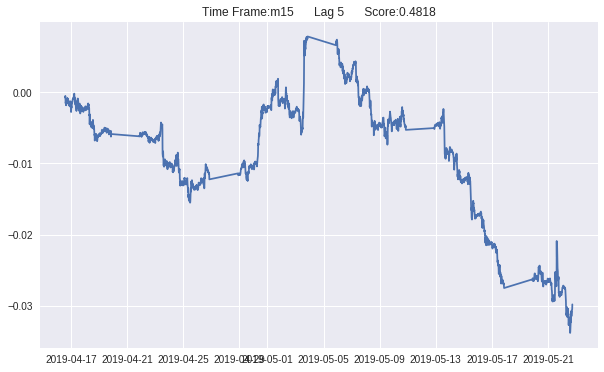

6
0.4817781337605126


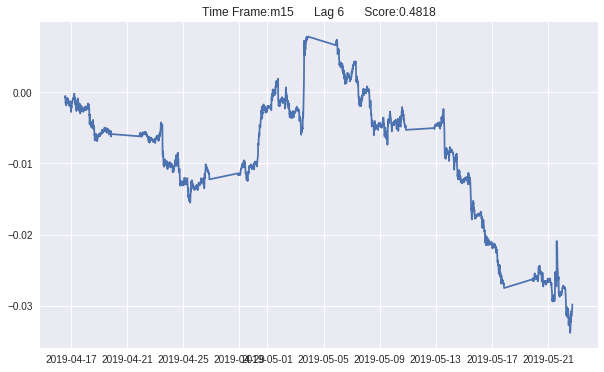

7
0.48197115384615385


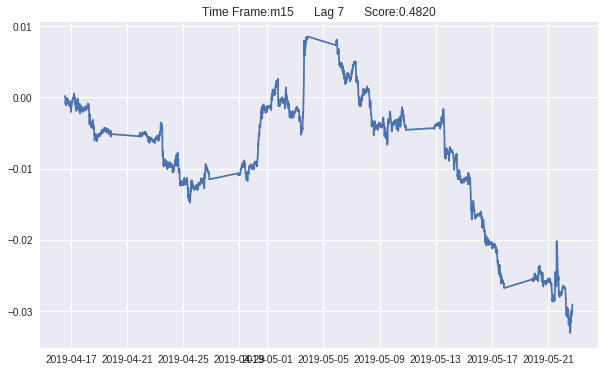

8
0.4983974358974359


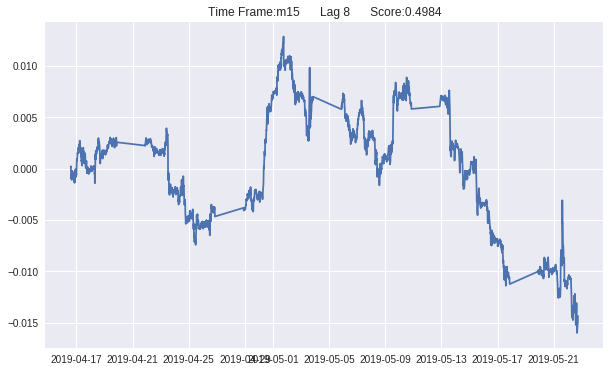

9
0.49739478957915834


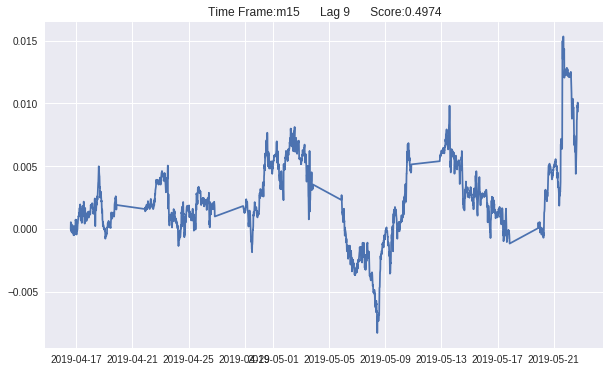

10
0.5086172344689379


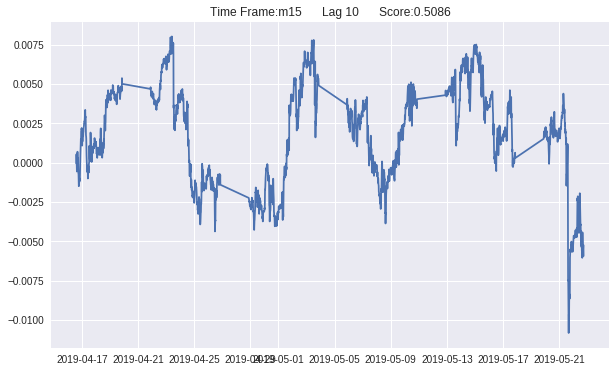

11
0.49438652766639934


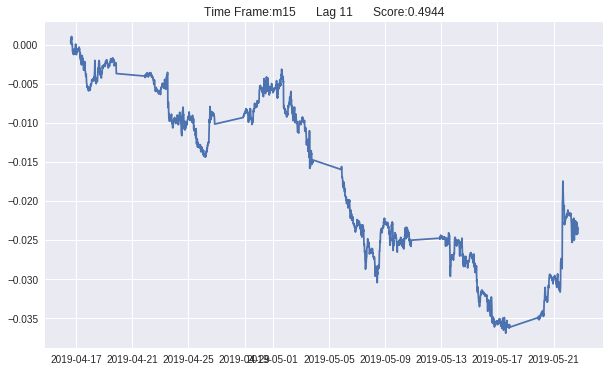

12
0.5092221331194867


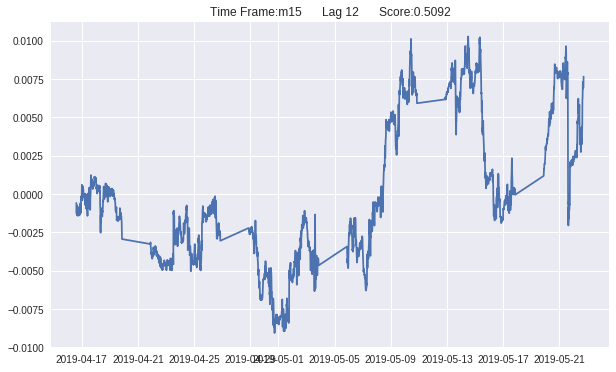

13
0.5086241476133173


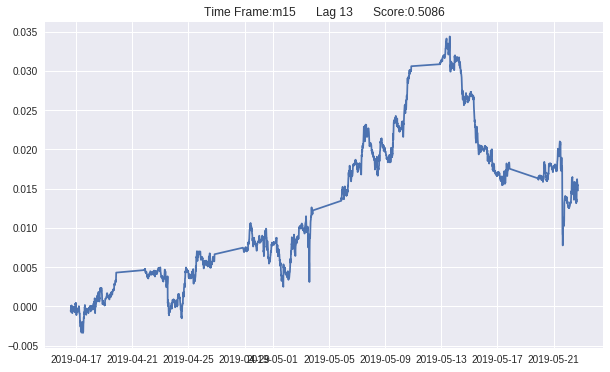

14
0.5318892900120337


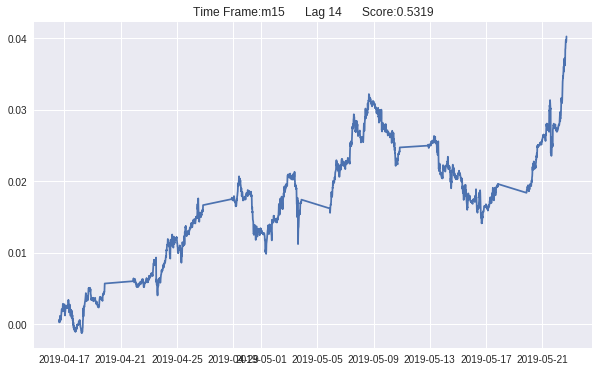

15
0.5136436597110754


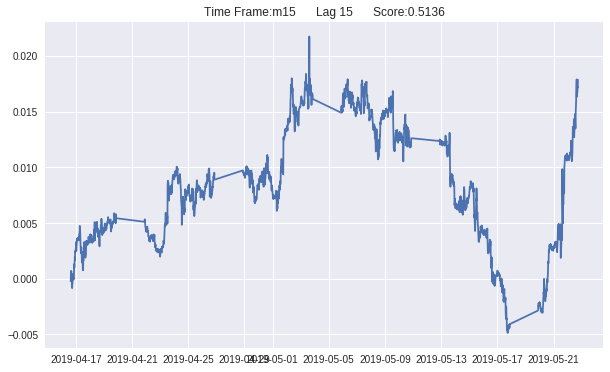

16
0.49919743178170145


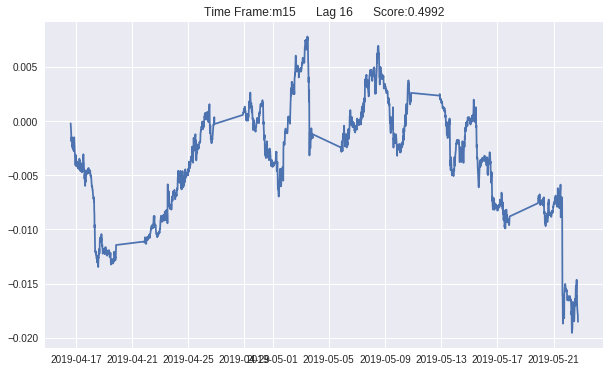

17
0.5090325170614212


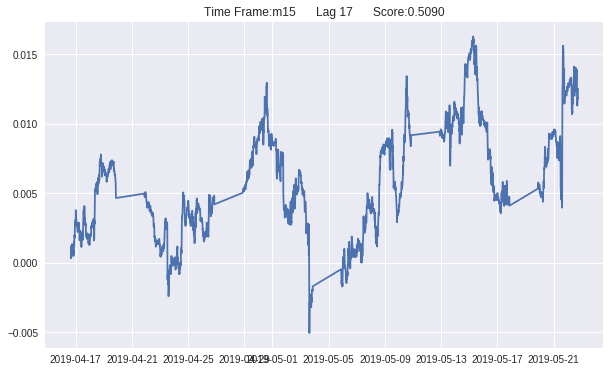

18
0.5114411882778


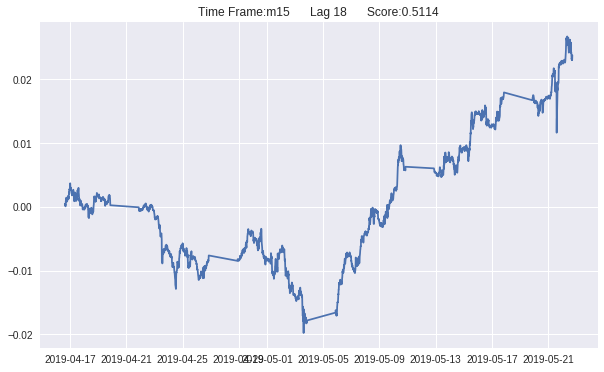

19
0.4927710843373494


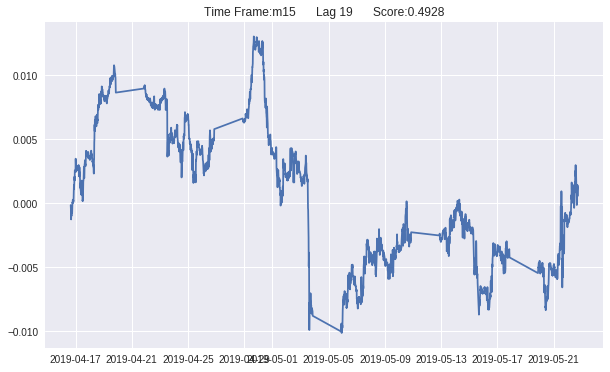

20
0.5144578313253012


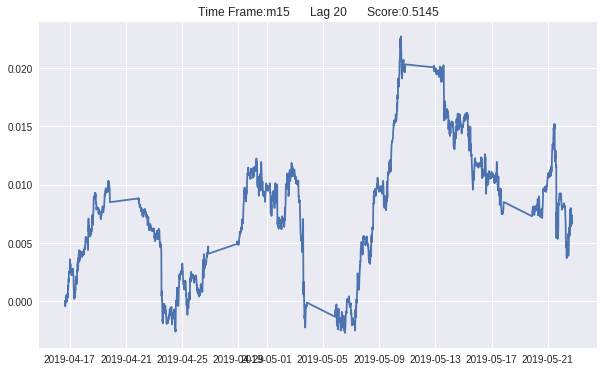

21
0.5038167938931297


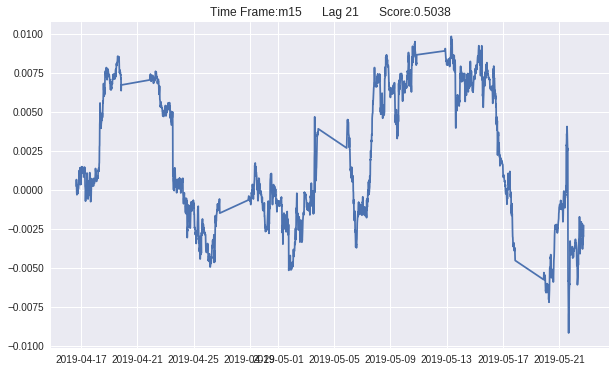

22
0.510646846122941


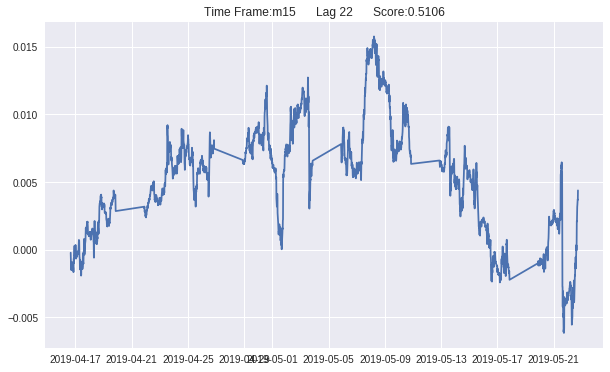

23
0.4895498392282958


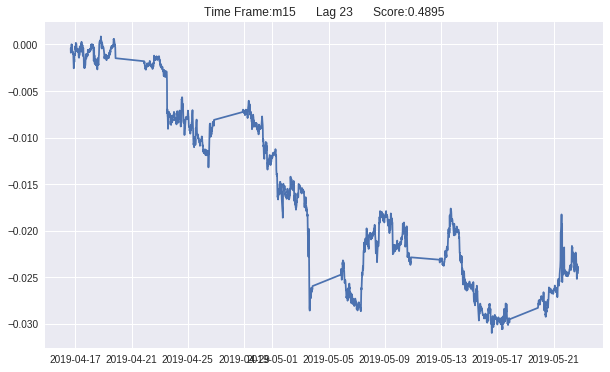

24
0.5056270096463023


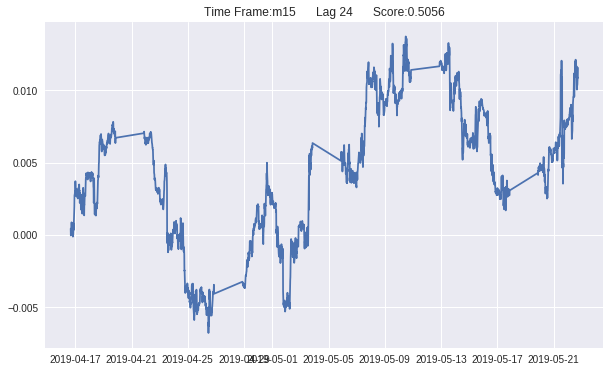

25
0.4889425010052272


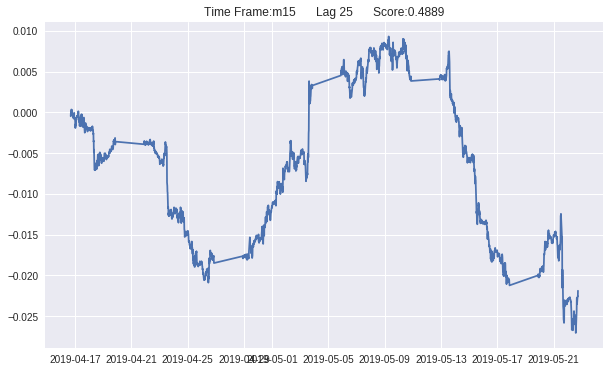

26
0.4881383192601528


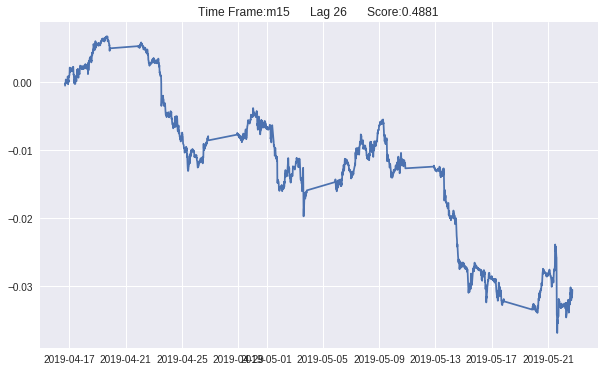

27
0.5128720836685439


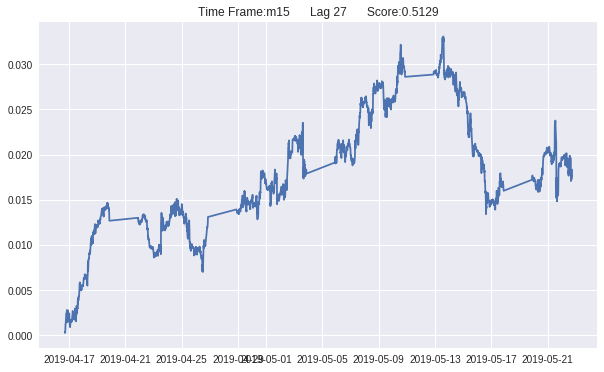

28
0.5112630732099759


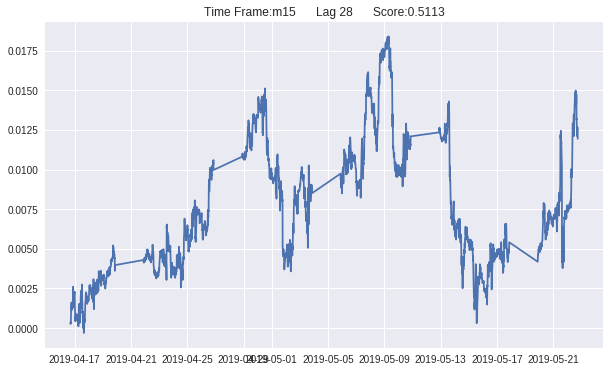

29
0.49859154929577465


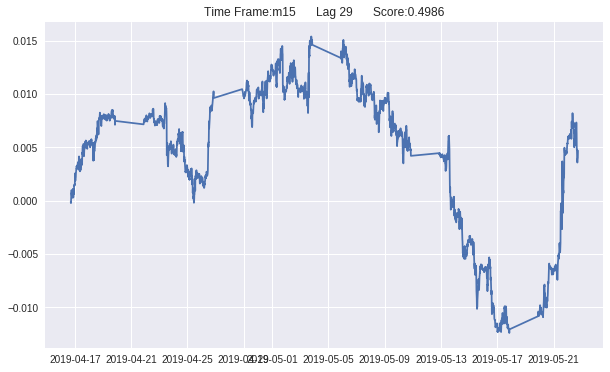

30
0.5231388329979879


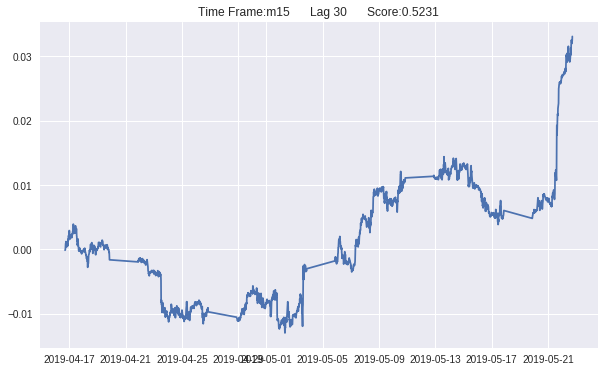

31
0.5245571658615137


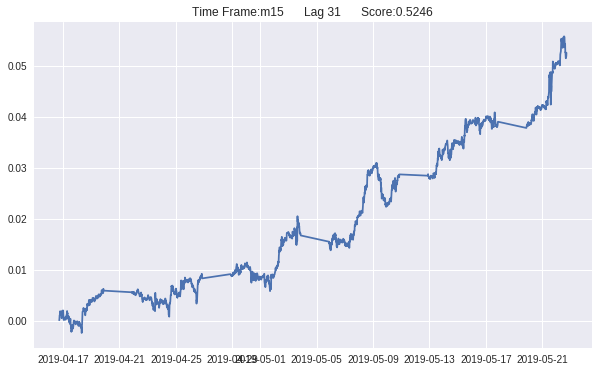

32
0.5112721417069244


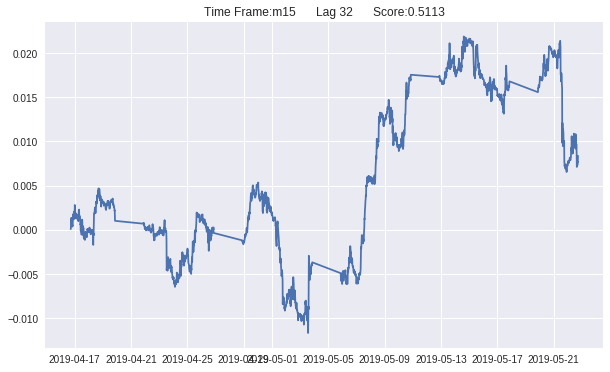

33
0.4905356423681031


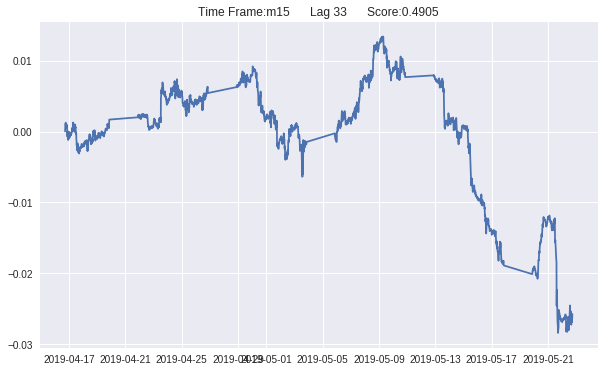

34
0.5098670962545309


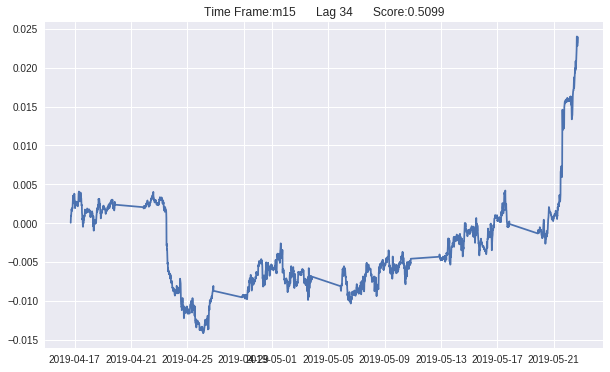

35
0.49556809024979853


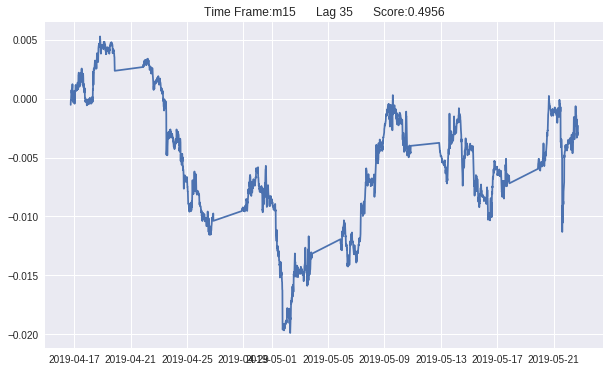

36
0.5052377115229654


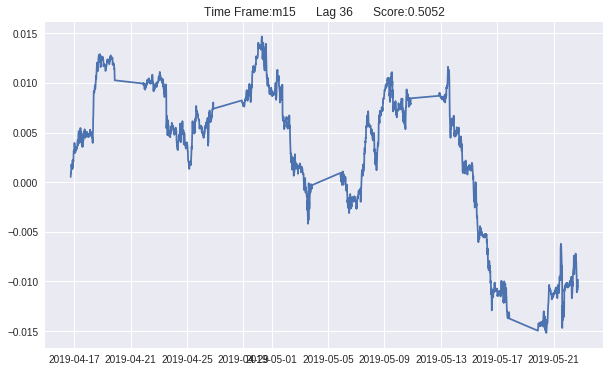

37
0.4957678355501814


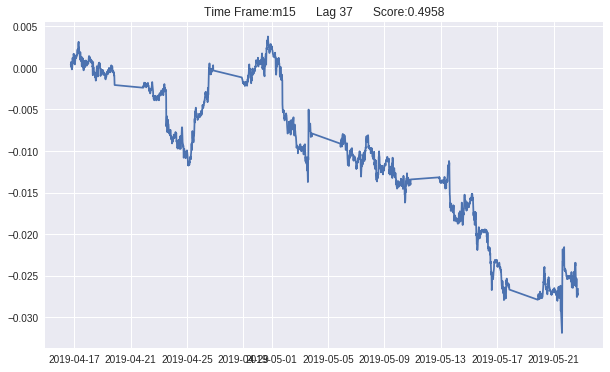

38
0.4893188230552197


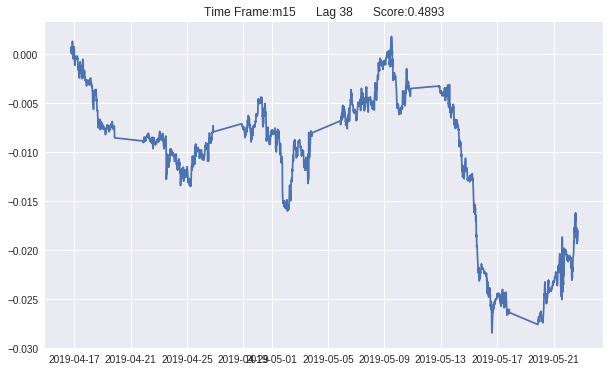

39
0.5032258064516129


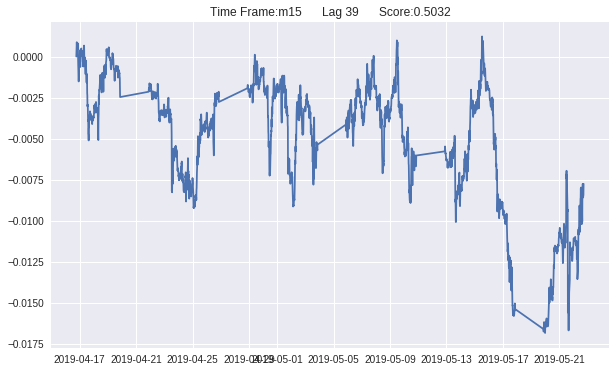

40
0.5


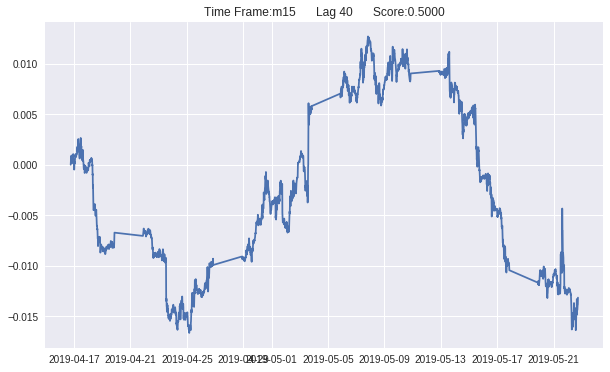

41
0.5082694634933441


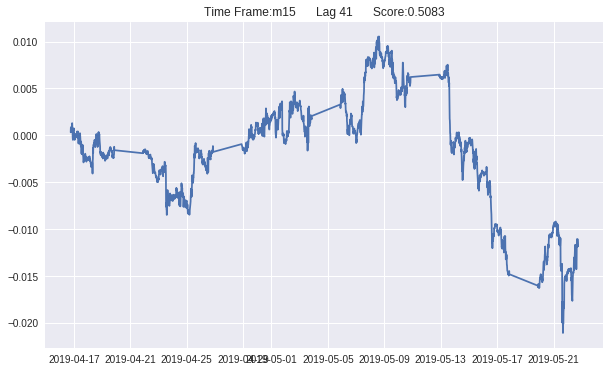

42
0.49616780960064544


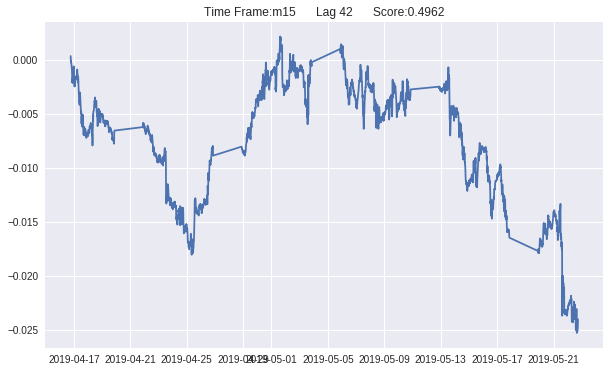

43
0.5088781275221953


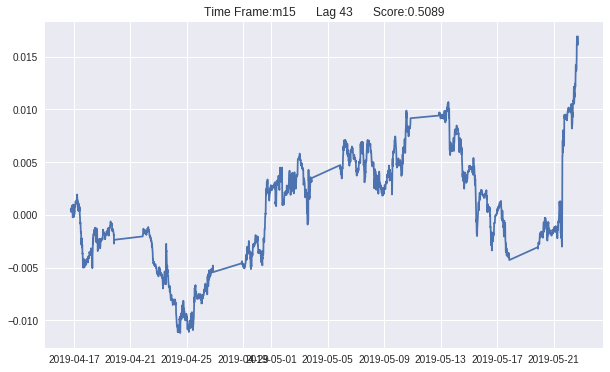

44
0.5008071025020178


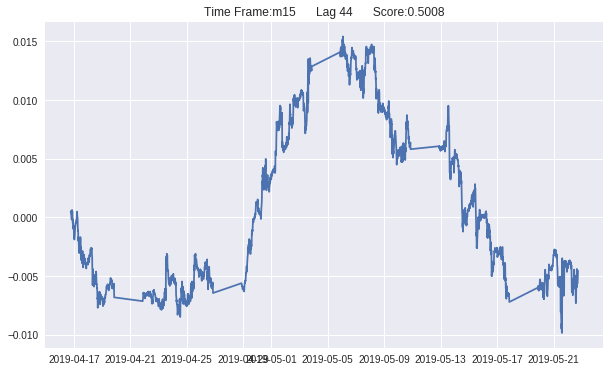

45
0.500605571255551


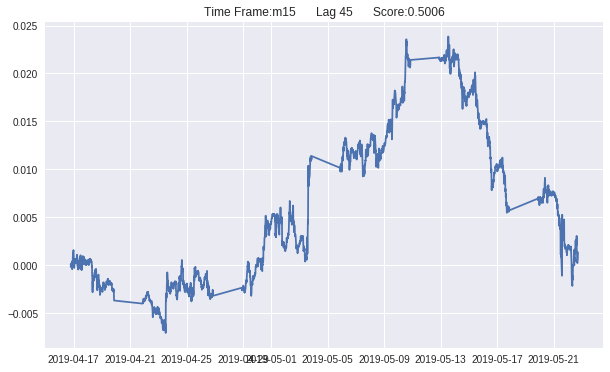

46
0.5155429955591442


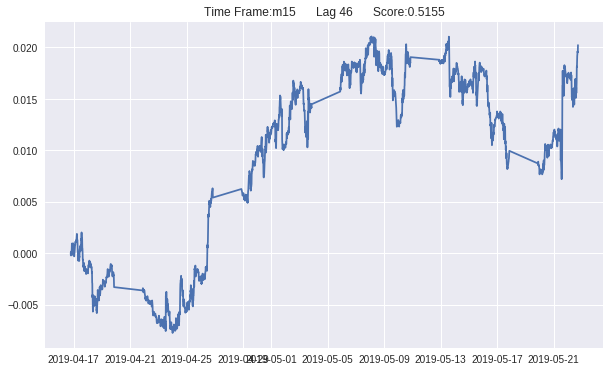

47
0.49636510500807757


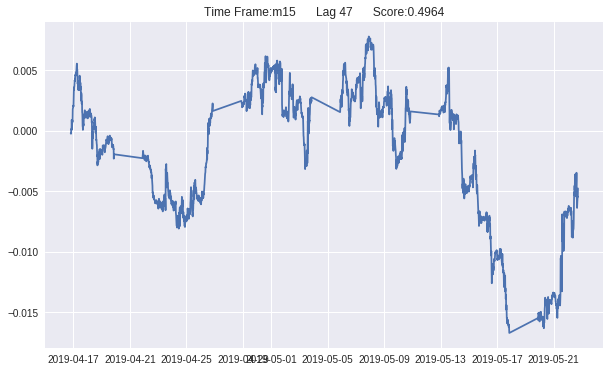

48
0.5278675282714055


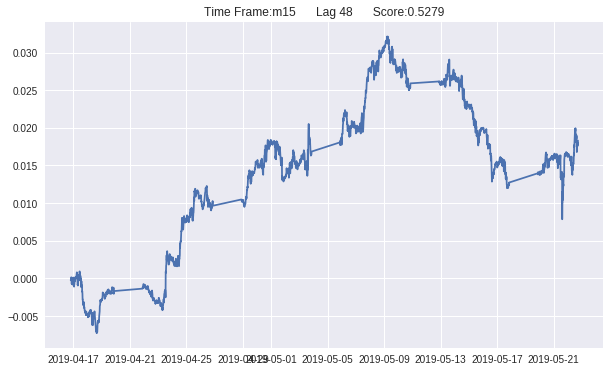

49
0.52


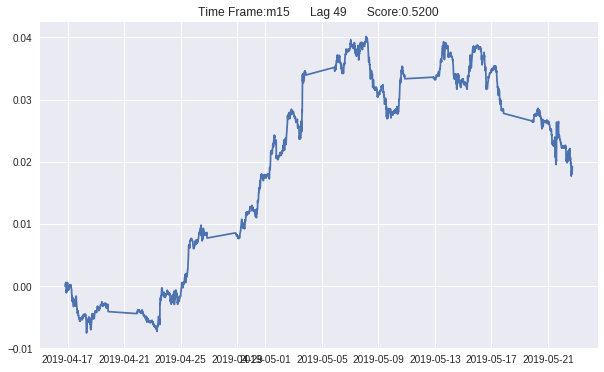

50
0.49575757575757573


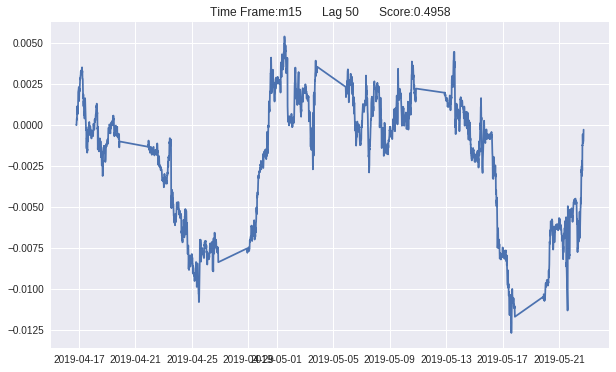

51
0.5024252223120452


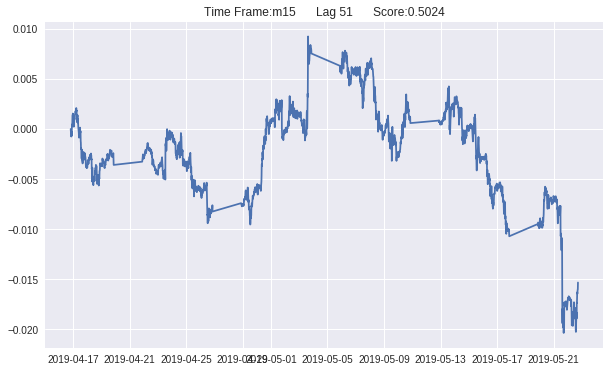

52
0.49232012934519


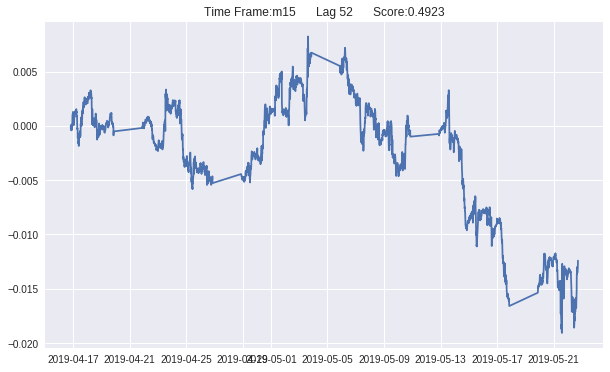

53
0.49534977759805904


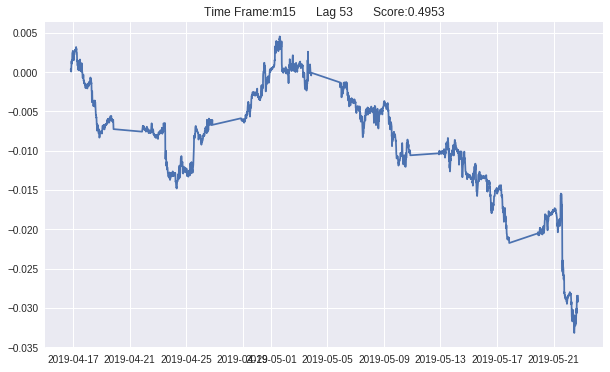

54
0.5034371209057824


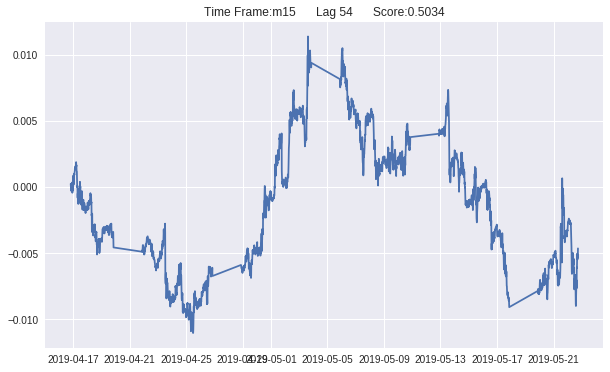

55
0.5121359223300971


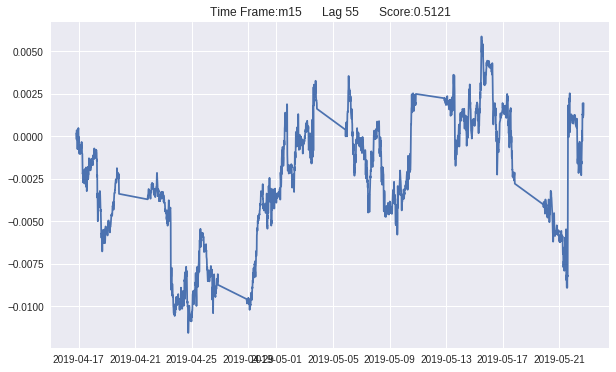

56
0.4878640776699029


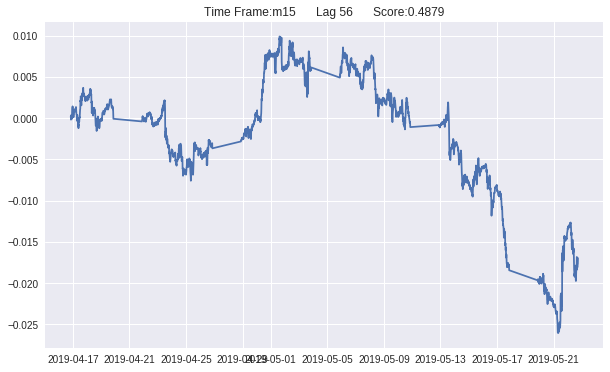

57
0.49939295831647107


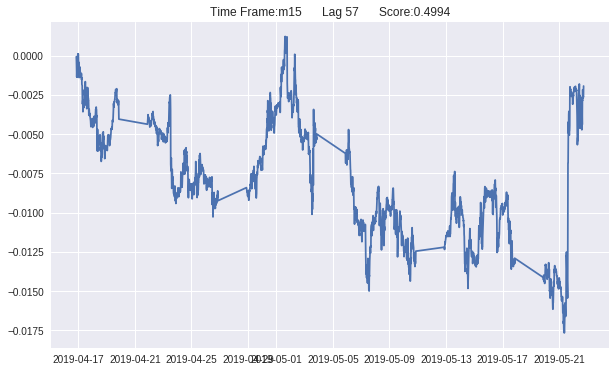

58
0.49575070821529743


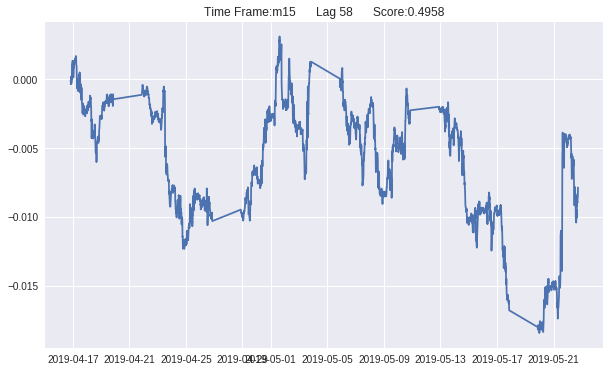

59
0.4979757085020243


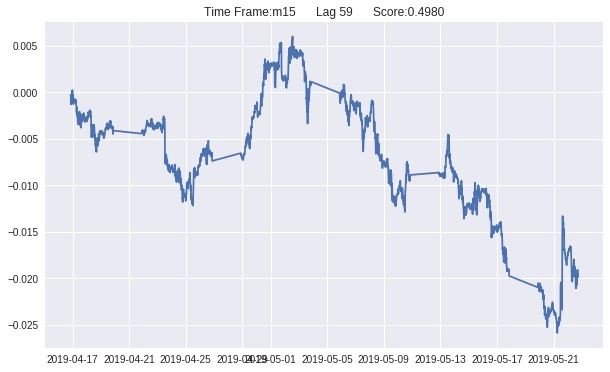

60
0.4983805668016194


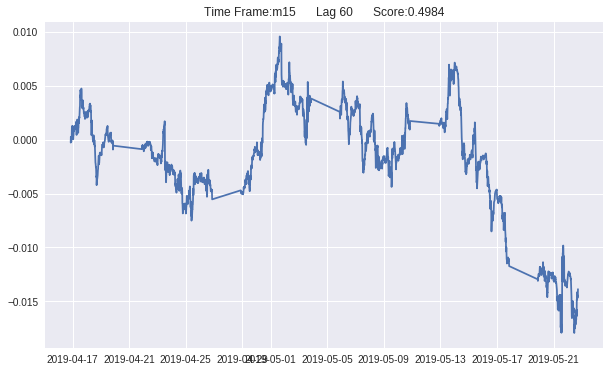

61
0.5018226002430134


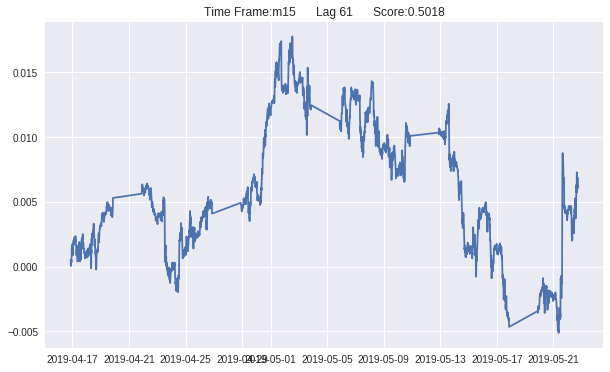

62
0.4835965978128797


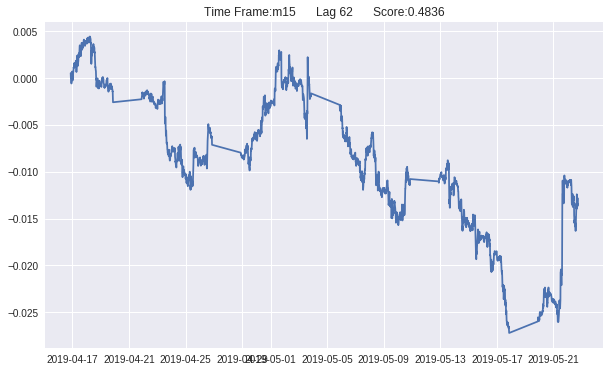

63
0.49716369529983795


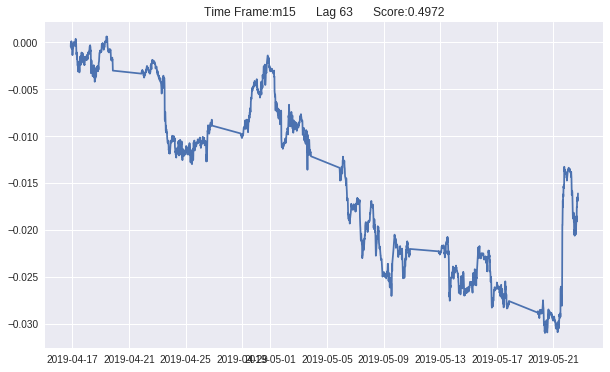

64
0.5048622366288493


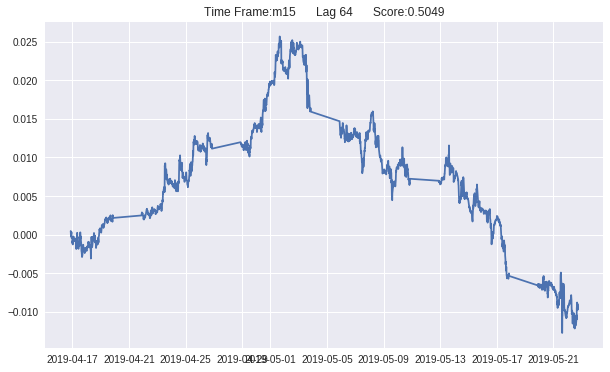

In [0]:
match(data,3,99)

In [0]:
np.save('/content/gdrive/My Drive/G/ML/python_for_finance/x.npy', score)